#Librerias

In [ ]:
!pip install factor-analyzer

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import ast
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA, PCA
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture as GMM
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.neighbors import NearestNeighbors
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import  KernelPCA

#Lecturas de Datos

In [ ]:
listing = pd.read_csv('/content/drive/MyDrive/Apuntes MODULO 3/Practica 2/listings.csv')
reviews = pd.read_csv('/content/drive/MyDrive/Apuntes MODULO 3/Practica 2/reviews.csv')
calendar = pd.read_csv('/content/drive/MyDrive/Apuntes MODULO 3/Practica 2/calendar.csv')

<ipython-input-3-2acc2257eb63>:1: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  listing = pd.read_csv('/content/drive/MyDrive/Apuntes MODULO 3/Practica 2/listings.csv')


In [ ]:
print(listing.shape)
print(reviews.shape)
print(calendar.shape)

(38277, 74)
(891964, 6)
(13964535, 7)


In [ ]:
print(listing.columns)
print(reviews.columns)
print(calendar.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [ ]:
listing.head(5)

id                        listing_url       scrape_id last_scraped  \
0  2595  https://www.airbnb.com/rooms/2595  20211204143024   2021-12-05   
1  3831  https://www.airbnb.com/rooms/3831  20211204143024   2021-12-05   
2  5121  https://www.airbnb.com/rooms/5121  20211204143024   2021-12-05   
3  5136  https://www.airbnb.com/rooms/5136  20211204143024   2021-12-05   
4  5178  https://www.airbnb.com/rooms/5178  20211204143024   2021-12-05   

                                                name  \
0                              Skylit Midtown Castle   
1  Whole flr w/private bdrm, bath & kitchen(pls r...   
2                                    BlissArtsSpace!   
3           Spacious Brooklyn Duplex, Patio + Garden   
4                   Large Furnished Room Near B'way　   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2  <b>The space</b><br />HELLO EVERYONE AND THANK...   
3  We welcome you to stay in our lovely 2 br dupl...   
4  Please don’t expect the luxury here just a bas...   

                               neighborhood_overview  \
0  Centrally located in the heart of Manhattan ju...   
1  Just the right mix of urban center and local n...   
2                                                NaN   
3                                                NaN   
4    Theater district, many restaurants around here.   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/f0813a11-40b2...     2845   
1  https://a0.muscache.com/pictures/e49999c2-9fd5...     4869   
2  https://a0.muscache.com/pictures/2090980c-b68e...     7356   
3  https://a0.muscache.com/pictures/miso/Hosting-...     7378   
4  https://a0.muscache.com/pictures/12065/f070997...     8967   

                                 host_url  ... review_scores_communication  \
0  https://www.airbnb.com/users/show/2845  ...                        4.79   
1  https://www.airbnb.com/users/show/4869  ...                        4.80   
2  https://www.airbnb.com/users/show/7356  ...                        4.91   
3  https://www.airbnb.com/users/show/7378  ...                        5.00   
4  https://www.airbnb.com/users/show/8967  ...                        4.42   

  review_scores_location review_scores_value license instant_bookable  \
0                   4.86                4.41     NaN                f   
1                   4.71                4.64     NaN                f   
2                   4.47                4.52     NaN                f   
3                   4.50                5.00     NaN                f   
4                   4.87                4.36     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              3                                           3   
1                              1                                           1   
2                              2                                           0   
3                              1                                           1   
4                              1                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            2   
3                                            0   
4                                            1   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.33  
1                                           0              4.86  
2                                           0              0.52  
3                                           0              0.02  
4                                           0              3.68  

[5 rows x 74 columns]

In [ ]:
reviews.head(5)

listing_id     id        date  reviewer_id reviewer_name  \
0        2595  17857  2009-11-21        50679          Jean   
1        2595  19176  2009-12-05        53267          Cate   
2        2595  19760  2009-12-10        38960         Anita   
3        2595  34320  2010-04-09        71130       Kai-Uwe   
4        2595  46312  2010-05-25       117113        Alicia   

                                            comments  
0  Notre séjour de trois nuits.\r<br/>Nous avons ...  
1                                  Great experience.  
2  I've stayed with my friend at the Midtown Cast...  
3  We've been staying here for about 9 nights, en...  
4  We had a wonderful stay at Jennifer's charming...

In [ ]:
calendar.head(5)

listing_id        date available    price adjusted_price  minimum_nights  \
0        2595  2021-12-05         f  $150.00        $150.00            30.0   
1       65615  2021-12-05         f   $85.00         $85.00            10.0   
2       65615  2021-12-06         f   $85.00         $85.00            10.0   
3       65615  2021-12-07         f   $85.00         $85.00            10.0   
4       65615  2021-12-08         f   $85.00         $85.00            10.0   

   maximum_nights  
0          1125.0  
1          1125.0  
2          1125.0  
3          1125.0  
4          1125.0

#Calidad de Datos

## Calendar

In [ ]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13964535 entries, 0 to 13964534
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 745.8+ MB


In [ ]:
#calendar['price'] = calendar['price'].str.replace('$', '').str.replace(',', '').astype(float)
#calendar['adjusted_price'] = calendar['adjusted_price'].str.replace('$', '').str.replace(',', '').astype(float)

In [ ]:
calendar.isnull().sum()

listing_id          0
date                0
available           0
price             171
adjusted_price    171
minimum_nights      2
maximum_nights      2
dtype: int64

In [ ]:
#ver los nulos de price y adjusted_price
# se reviso por separado y ambos dieron los mismos registros con null
nul_cprice = calendar[calendar['price'].isnull()]
nul_cprice

listing_id        date available price adjusted_price  \
7391294    33049409  2022-06-16         f   NaN            NaN   
7391295    33049409  2022-06-17         f   NaN            NaN   
7391296    33049409  2022-06-18         f   NaN            NaN   
7391297    33049409  2022-06-19         f   NaN            NaN   
7391298    33049409  2022-06-20         f   NaN            NaN   
...             ...         ...       ...   ...            ...   
7391610    33049409  2022-11-29         f   NaN            NaN   
7391611    33049409  2022-11-30         f   NaN            NaN   
7391612    33049409  2022-12-01         f   NaN            NaN   
7391613    33049409  2022-12-02         f   NaN            NaN   
7391614    33049409  2022-12-03         f   NaN            NaN   

         minimum_nights  maximum_nights  
7391294            30.0            89.0  
7391295            30.0            89.0  
7391296            30.0            89.0  
7391297            30.0            89.0  
7391298            30.0            89.0  
...                 ...             ...  
7391610            30.0            89.0  
7391611            30.0            89.0  
7391612            30.0            89.0  
7391613            30.0            89.0  
7391614            30.0            89.0  

[171 rows x 7 columns]

In [ ]:
nul_cprice['listing_id'].unique()

array([33049409])

In [ ]:
#como solo es un registro verificamos su historial de precios para poder tratar sus valores
reg = calendar[calendar['listing_id'] == 33049409]
colum = ['listing_id', 'price', 'adjusted_price', 'date']
reg[colum].head(5)

listing_id   price adjusted_price        date
7390585    33049409  $90.00         $90.00  2021-12-05
7390586    33049409  $90.00         $90.00  2021-12-06
7390587    33049409  $90.00         $90.00  2021-12-07
7390588    33049409  $90.00         $90.00  2021-12-08
7390589    33049409  $90.00         $90.00  2021-12-09

In [ ]:
reg['price'].unique()

array(['$90.00', nan], dtype=object)

In [ ]:
reg['adjusted_price'].unique()

array(['$90.00', nan], dtype=object)

In [ ]:
#Como solo hay un valor para cada colummna, rellenamos los valores nulos con ese unico valor.
calendar['price'] = calendar['price'].fillna('$90.00')
calendar['adjusted_price'] = calendar['adjusted_price'].fillna('$90.00')

In [ ]:
#Verificar si los valores nulos se han llenado
print(calendar[['price', 'adjusted_price']].isnull().sum())

price             0
adjusted_price    0
dtype: int64


In [ ]:
#ver los nulos de minimum_nights y maximum_nights
# se reviso por separado y ambos dieron los mismos registros con null
nul_nights = calendar[calendar[['minimum_nights', 'maximum_nights']].isnull().any(axis=1)]
nul_nights

listing_id        date available   price adjusted_price  \
5271047    21765895  2021-12-04         f  $64.00         $64.00   
6876585    30468020  2022-12-04         t  $53.00         $50.00   

         minimum_nights  maximum_nights  
5271047             NaN             NaN  
6876585             NaN             NaN

In [ ]:
reg = calendar[calendar['listing_id'] == 21765895]
colum = ['listing_id', 'minimum_nights', 'maximum_nights', 'date']
reg[colum].head(5)

listing_id  minimum_nights  maximum_nights        date
5271047    21765895             NaN             NaN  2021-12-04
5271048    21765895            30.0            45.0  2021-12-05
5271049    21765895            30.0            45.0  2021-12-06
5271050    21765895            30.0            45.0  2021-12-07
5271051    21765895            30.0            45.0  2021-12-08

In [ ]:
reg['minimum_nights'].unique()

array([nan, 30.])

In [ ]:
reg['maximum_nights'].unique()

array([nan, 45.])

In [ ]:
#Apoyandonos del mismo metodo para las columnas de precios aplicamos los valores unicos de noches minimas y maximas para el registro 21765895
filtro = calendar['listing_id'] == 21765895
calendar.loc[filtro, 'minimum_nights'] = calendar.loc[filtro, 'minimum_nights'].fillna(30.0)
calendar.loc[filtro, 'maximum_nights'] = calendar.loc[filtro, 'maximum_nights'].fillna(45.0)

In [ ]:
reg = calendar[calendar['listing_id'] == 30468020]
colum = ['listing_id', 'minimum_nights', 'maximum_nights', 'date']
reg[colum].head(2)

listing_id  minimum_nights  maximum_nights        date
6875653    30468020            30.0          1125.0  2021-12-05
6875654    30468020            30.0          1125.0  2021-12-06

In [ ]:
reg['minimum_nights'].unique()

array([30., nan])

In [ ]:
reg['maximum_nights'].unique()

array([1125.,   nan])

In [ ]:
#ahora realizamos lo mismo con el registro 30468020
filtro = calendar['listing_id'] == 30468020
calendar.loc[filtro, 'minimum_nights'] = calendar.loc[filtro, 'minimum_nights'].fillna(30.0)
calendar.loc[filtro, 'maximum_nights'] = calendar.loc[filtro, 'maximum_nights'].fillna(1125.0)

In [ ]:
calendar.isnull().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

In [ ]:
calendar

listing_id        date available    price adjusted_price  \
0               2595  2021-12-05         f  $150.00        $150.00   
1              65615  2021-12-05         f   $85.00         $85.00   
2              65615  2021-12-06         f   $85.00         $85.00   
3              65615  2021-12-07         f   $85.00         $85.00   
4              65615  2021-12-08         f   $85.00         $85.00   
...              ...         ...       ...      ...            ...   
13964530    51781100  2022-11-30         t  $300.00        $300.00   
13964531    51781100  2022-12-01         t  $300.00        $300.00   
13964532    51781100  2022-12-02         t  $300.00        $300.00   
13964533    51781100  2022-12-03         t  $300.00        $300.00   
13964534    51781100  2022-12-04         t  $300.00        $300.00   

          minimum_nights  maximum_nights  
0                   30.0          1125.0  
1                   10.0          1125.0  
2                   10.0          1125.0  
3                   10.0          1125.0  
4                   10.0          1125.0  
...                  ...             ...  
13964530             1.0           365.0  
13964531             1.0           365.0  
13964532             1.0           365.0  
13964533             1.0           365.0  
13964534             1.0           365.0  

[13964535 rows x 7 columns]

In [ ]:
# Comprobar valores únicos por listing_id
columns_to_check = ["price", "adjusted_price", "minimum_nights", "maximum_nights"]
unique_values = calendar.groupby("listing_id")[columns_to_check].nunique()

print("Valores únicos por listing_id:")
print(unique_values)

Valores únicos por listing_id:
            price  adjusted_price  minimum_nights  maximum_nights
listing_id                                                       
2595           23              23               1               1
3831            7               7               1               1
5121            1               1               1               1
5136            1               1               1               1
5178            1               1               1               1
...           ...             ...             ...             ...
53662330        3               3               1               1
53662542        7               7               1               1
53662772        2               2               1               1
53663081        3               3               1               1
53665099        3               3               1               1

[38259 rows x 4 columns]


In [ ]:
#Agrupar ppor listing_id y obtenr su primer precio registrado, su precio mas actual y su precio mas usado
calendar["date"] = pd.to_datetime(calendar["date"])

calendar = calendar.sort_values(by=["listing_id", "date"])

calendar_price = calendar.groupby("listing_id").agg(
    first_price=("price", "first"),               # Primer precio basado en la fecha más antigua
    last_price=("price", "last"),                # Último precio basado en la fecha más reciente
    mode_price=("price", lambda x: x.mode()[0])  # Precio más frecuente (moda)
).reset_index()

calendar_price

listing_id first_price last_price mode_price
0            2595     $150.00    $225.00    $225.00
1            3831      $73.00     $78.00     $76.00
2            5121      $60.00     $60.00     $60.00
3            5136     $275.00    $275.00    $275.00
4            5178      $68.00     $68.00     $68.00
...           ...         ...        ...        ...
38254    53662330      $79.00     $89.00     $89.00
38255    53662542      $76.00     $69.00     $69.00
38256    53662772     $145.00    $145.00    $145.00
38257    53663081      $79.00    $115.00    $115.00
38258    53665099     $825.00    $825.00    $825.00

[38259 rows x 4 columns]

In [ ]:
calendar_price.dtypes

listing_id      int64
first_price    object
last_price     object
mode_price     object
dtype: object

In [ ]:
#pasarlas a tipo float
columns_to_convert = ['first_price', 'last_price', 'mode_price']

# Eliminamos el signo '$' y convertimos a tipo float
for column in columns_to_convert:
    calendar_price[column] = (
        calendar_price[column]
        .str.replace(r'[\$,]', '', regex=True)
        .astype(float)
    )
print(calendar_price.dtypes)

listing_id       int64
first_price    float64
last_price     float64
mode_price     float64
dtype: object


In [ ]:
calendar_price

listing_id  first_price  last_price  mode_price
0            2595        150.0       225.0       225.0
1            3831         73.0        78.0        76.0
2            5121         60.0        60.0        60.0
3            5136        275.0       275.0       275.0
4            5178         68.0        68.0        68.0
...           ...          ...         ...         ...
38254    53662330         79.0        89.0        89.0
38255    53662542         76.0        69.0        69.0
38256    53662772        145.0       145.0       145.0
38257    53663081         79.0       115.0       115.0
38258    53665099        825.0       825.0       825.0

[38259 rows x 4 columns]

In [ ]:
#Agrupar por listing id y obtener el numero minimo de noches y el maximo de noches sin importar la fecha
calendar_nights = calendar.groupby("listing_id").agg(
    min_nights=("minimum_nights", "min"),  # Mínimo de noches
    max_nights=("maximum_nights", "max")  # Máximo de noches
).reset_index()
calendar_nights

listing_id  min_nights  max_nights
0            2595        30.0      1125.0
1            3831         1.0       730.0
2            5121        30.0       730.0
3            5136         5.0      1125.0
4            5178         2.0        14.0
...           ...         ...         ...
38254    53662330         1.0      1125.0
38255    53662542         1.0      1125.0
38256    53662772         1.0      1125.0
38257    53663081         1.0      1125.0
38258    53665099         1.0      1125.0

[38259 rows x 3 columns]

In [ ]:
#unimos los data frame que agrupamos por listing_id
calendar_final = pd.merge(calendar_price, calendar_nights, on='listing_id', how='inner')
calendar_final

listing_id  first_price  last_price  mode_price  min_nights  max_nights
0            2595        150.0       225.0       225.0        30.0      1125.0
1            3831         73.0        78.0        76.0         1.0       730.0
2            5121         60.0        60.0        60.0        30.0       730.0
3            5136        275.0       275.0       275.0         5.0      1125.0
4            5178         68.0        68.0        68.0         2.0        14.0
...           ...          ...         ...         ...         ...         ...
38254    53662330         79.0        89.0        89.0         1.0      1125.0
38255    53662542         76.0        69.0        69.0         1.0      1125.0
38256    53662772        145.0       145.0       145.0         1.0      1125.0
38257    53663081         79.0       115.0       115.0         1.0      1125.0
38258    53665099        825.0       825.0       825.0         1.0      1125.0

[38259 rows x 6 columns]

In [ ]:
calendar_final.isnull().sum()

listing_id     0
first_price    0
last_price     0
mode_price     0
min_nights     0
max_nights     0
dtype: int64

## Reviews

In [ ]:
#verificamos si hay datos faltantes
reviews.isnull().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      7
comments         910
dtype: int64

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891964 entries, 0 to 891963
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     891964 non-null  int64 
 1   id             891964 non-null  int64 
 2   date           891964 non-null  object
 3   reviewer_id    891964 non-null  int64 
 4   reviewer_name  891957 non-null  object
 5   comments       891054 non-null  object
dtypes: int64(3), object(3)
memory usage: 40.8+ MB


In [ ]:
#vamos a ver si encontramos duplicados por medio del identificador de opiniones reviewer_id
duplicated_ids = reviews[reviews.duplicated(subset=['id'], keep=False)]
duplicated_records = reviews[reviews['id'].isin(duplicated_ids['id'])]
duplicated_records

listing_id                  id        date  reviewer_id  \
795215    40756238           712254862  2020-11-29    341016183   
795216    40756238           743200894  2021-03-28    354884210   
795217    40756238           764342674  2021-05-30     47635763   
795218    40756238  409324747356711935  2021-07-18    176225459   
795219    40756238  442008270927132507  2021-09-01    419634104   
795220    40756238  454960844323323084  2021-09-19     89501581   
795221    40756238  465108612947324876  2021-10-03    113426810   
795222    40756238  468777236557599884  2021-10-08    250522731   
795223    40756238  471717184479700407  2021-10-12      8479859   
795224    40756268           640020184  2020-07-19    335868921   
795225    40756268           769848811  2021-06-13    334824135   
795226    40756300           657502187  2020-08-28    231682123   
795227    40756435  434690185371335971  2021-08-22     58992726   
795228    40756456           703923668  2020-10-25     52169624   
795229    40756456           710706754  2020-11-22    190991260   
795230    40756456           752398116  2021-04-26     11358779   
795231    40756456           756149175  2021-05-08    358430294   
795232    40756456           768095108  2021-06-08     60974995   
795233    40756456  442679777755672541  2021-09-02      4565551   
795234    40756468  412189245921611799  2021-07-22    406295981   
795235    40756468  468739715240331187  2021-10-08    380366534   
795236    40756475           705896415  2020-11-01    327973032   
795237    40756475           713825490  2020-12-06    377793262   
805435    42065564           640020184  2020-07-19    335868921   
805436    42065564           657502187  2020-08-28    231682123   
805437    42065564           703923668  2020-10-25     52169624   
805438    42065564           705896415  2020-11-01    327973032   
805439    42065564           710706754  2020-11-22    190991260   
805440    42065564           712254862  2020-11-29    341016183   
805441    42065564           713825490  2020-12-06    377793262   
805442    42065564           743200894  2021-03-28    354884210   
805443    42065564           752398116  2021-04-26     11358779   
805444    42065564           756149175  2021-05-08    358430294   
805445    42065564           764342674  2021-05-30     47635763   
805446    42065564           768095108  2021-06-08     60974995   
805447    42065564           769848811  2021-06-13    334824135   
805448    42065564  409324747356711935  2021-07-18    176225459   
805449    42065564  412189245921611799  2021-07-22    406295981   
805450    42065564  434690185371335971  2021-08-22     58992726   
805451    42065564  442008270927132507  2021-09-01    419634104   
805452    42065564  442679777755672541  2021-09-02      4565551   
805453    42065564  454960844323323084  2021-09-19     89501581   
805454    42065564  465108612947324876  2021-10-03    113426810   
805455    42065564  468739715240331187  2021-10-08    380366534   
805456    42065564  468777236557599884  2021-10-08    250522731   
805457    42065564  471717184479700407  2021-10-12      8479859   

            reviewer_name                                           comments  
795215            Jocelyn                                        Great stay!  
795216             Ronald  The location is great & the pier is nearby to ...  
795217              Carol  We stayed over one night with our kids. The lo...  
795218              Marco                       Very good place on Manhattan  
795219              James  Great hotel and they are updating their roofto...  
795220               Eric  Got a great rate, really clean room, friendly ...  
795221                Val  Very spacious room. Can’t beat the price. Very...  
795222              Jason                                        Great place  
795223        Ross Nikola  Good location, spacious for 5 people. We reall...  
795224               Ivan  Great Location. Great attention. A hotel 

In [ ]:
reviews_id = reviews[reviews['id'] == 712254862]
reviews_id

listing_id         id        date  reviewer_id reviewer_name  \
795215    40756238  712254862  2020-11-29    341016183       Jocelyn   
805440    42065564  712254862  2020-11-29    341016183       Jocelyn   

           comments  
795215  Great stay!  
805440  Great stay!

In [ ]:
#eliminamos duplicados ya que si encontramos
reviews = reviews.drop_duplicates(subset = "id",keep="first")

In [ ]:
reviews.shape

(891941, 6)

In [ ]:
#Buscamos cuales son los que tienen datos null por columna para identificar como tratarlos
nul_rname = reviews[reviews['reviewer_name'].isnull()]
nul_rname

listing_id         id        date  reviewer_id reviewer_name  \
364021    12425266  107941660  2016-10-13      4751749           NaN   
536921    20705026  321080490  2018-09-09     32989004           NaN   
592867    23483525  526080779  2019-09-08     32989004           NaN   
642858    27409329  531741166  2019-09-18    292409881           NaN   
709534    32661291  509463395  2019-08-14     67667870           NaN   
781246    39204077  602052431  2020-02-05    333021262           NaN   
781249    39204077  604510054  2020-02-11    333021262           NaN   

                                                 comments  
364021  Our stay with Clarrisa  was pleasant. Clarrisa...  
536921  If you need small cosy room close to USTA comp...  
592867  It was an enjoyable place to stay. Exactly as ...  
642858  Everything is good and the host is so nice. Ev...  
709534        A generally nice location around Manhattan!  
781246  She was absolutely amazing. Very nice , answer...  
781249                                         Great host

In [ ]:
reg = reviews[reviews['listing_id'] == 12425266]
colum = ['listing_id', 'id', 'date', 'reviewer_id','reviewer_name', 'comments']
reg[colum].head(10)

listing_id         id        date  reviewer_id reviewer_name  \
364015    12425266   73033268  2016-05-06      1170890       Marlous   
364016    12425266   74810346  2016-05-16     65129432       Natalie   
364017    12425266   86882896  2016-07-17     10993200        Leanne   
364018    12425266  103830005  2016-09-24     93618753          Asaf   
364019    12425266  105946595  2016-10-03     78113902     Alejandro   
364020    12425266  107435330  2016-10-10     95422321      Aravinth   
364021    12425266  107941660  2016-10-13      4751749           NaN   
364022    12425266  124699932  2017-01-02    100117570        Hélène   
364023    12425266  145302007  2017-04-17     34149326        Ayesha   
364024    12425266  153719338  2017-05-21     45394396          Troy   

                                                 comments  
364015  Very nice and welcoming. House is nice and cle...  
364016  The host, Ingrid which is clarissa's sister is...  
364017                                 Very accomodating!  
364018  Clarissa was a charming hostess, although duri...  
364019  Getting in contact with Clarissa was very easy...  
364020  Gastgeberin war sehr nett! \r<br/>Die Gegend i...  
364021  Our stay with Clarrisa  was pleasant. Clarrisa...  
364022  We spent a good and pleasant moment in her app...  
364023  Great place to crash at night. Very clean and ...  
364024  Clarissa was a great host! She was very accomm...

In [ ]:
#Imputar los valores nulos en la columna reviewer_name con la moda, solo con nombres dentro del listing_id = 12425266
filtro = reviews['listing_id'] == 12425266
moda_reviewer_name = reviews.loc[filtro, 'reviewer_name'].mode()[0]
reviews.loc[filtro, 'reviewer_name'] = reviews.loc[filtro, 'reviewer_name'].fillna(moda_reviewer_name)

In [ ]:
nul_rname = reviews[reviews['reviewer_name'].isnull()]
nul_rname

listing_id         id        date  reviewer_id reviewer_name  \
536921    20705026  321080490  2018-09-09     32989004           NaN   
592867    23483525  526080779  2019-09-08     32989004           NaN   
642858    27409329  531741166  2019-09-18    292409881           NaN   
709534    32661291  509463395  2019-08-14     67667870           NaN   
781246    39204077  602052431  2020-02-05    333021262           NaN   
781249    39204077  604510054  2020-02-11    333021262           NaN   

                                                 comments  
536921  If you need small cosy room close to USTA comp...  
592867  It was an enjoyable place to stay. Exactly as ...  
642858  Everything is good and the host is so nice. Ev...  
709534        A generally nice location around Manhattan!  
781246  She was absolutely amazing. Very nice , answer...  
781249                                         Great host

In [ ]:
reg = reviews[reviews['listing_id'] == 20705026]
colum = ['listing_id', 'id', 'date', 'reviewer_id','reviewer_name', 'comments']
reg[colum].head(6)

listing_id         id        date  reviewer_id reviewer_name  \
536865    20705026  190950870  2017-09-05     17387960       Obawole   
536866    20705026  191448299  2017-09-07     36548987         Jason   
536867    20705026  196014876  2017-09-21    148799194       Tsutomu   
536868    20705026  196587545  2017-09-23     98349432         Kiran   
536869    20705026  198213165  2017-09-28    151464144       Pradeep   
536870    20705026  199311144  2017-10-01     34750414        Deepak   

                                                 comments  
536865       Great host! Great place for a peaceful stay!  
536866                        Great stay! For queens area  
536867  It's very comfortable house and host is very k...  
536868  The stay in Bing's house in Flushing was great...  
536869  Place is very clean and safe to stay . Very ne...  
536870  Bings place is clean and convenient and the be...

In [ ]:
#Imputar los valores nulos en la columna reviewer_name con la moda, solo con nombres dentro del listing_id = 20705026
filtro = reviews['listing_id'] == 20705026
moda_reviewer_name = reviews.loc[filtro, 'reviewer_name'].mode()[0]
reviews.loc[filtro, 'reviewer_name'] = reviews.loc[filtro, 'reviewer_name'].fillna(moda_reviewer_name)

In [ ]:
nul_rname = reviews[reviews['reviewer_name'].isnull()]
nul_rname

listing_id         id        date  reviewer_id reviewer_name  \
592867    23483525  526080779  2019-09-08     32989004           NaN   
642858    27409329  531741166  2019-09-18    292409881           NaN   
709534    32661291  509463395  2019-08-14     67667870           NaN   
781246    39204077  602052431  2020-02-05    333021262           NaN   
781249    39204077  604510054  2020-02-11    333021262           NaN   

                                                 comments  
592867  It was an enjoyable place to stay. Exactly as ...  
642858  Everything is good and the host is so nice. Ev...  
709534        A generally nice location around Manhattan!  
781246  She was absolutely amazing. Very nice , answer...  
781249                                         Great host

In [ ]:
#Imputar los valores nulos en la columna reviewer_name con la moda, solo con nombres dentro del listing_id = 23483525
filtro = reviews['listing_id'] == 23483525
moda_reviewer_name = reviews.loc[filtro, 'reviewer_name'].mode()[0]
reviews.loc[filtro, 'reviewer_name'] = reviews.loc[filtro, 'reviewer_name'].fillna(moda_reviewer_name)

In [ ]:
#Imputar los valores nulos en la columna reviewer_name con la moda, solo con nombres dentro del listing_id = 27409329
filtro = reviews['listing_id'] == 27409329
moda_reviewer_name = reviews.loc[filtro, 'reviewer_name'].mode()[0]
reviews.loc[filtro, 'reviewer_name'] = reviews.loc[filtro, 'reviewer_name'].fillna(moda_reviewer_name)

In [ ]:
#Imputar los valores nulos en la columna reviewer_name con la moda, solo con nombres dentro del listing_id = 32661291
filtro = reviews['listing_id'] == 32661291
moda_reviewer_name = reviews.loc[filtro, 'reviewer_name'].mode()[0]
reviews.loc[filtro, 'reviewer_name'] = reviews.loc[filtro, 'reviewer_name'].fillna(moda_reviewer_name)

In [ ]:
#Imputar los valores nulos en la columna reviewer_name con la moda, solo con nombres dentro del listing_id = 39204077
filtro = reviews['listing_id'] == 39204077
moda_reviewer_name = reviews.loc[filtro, 'reviewer_name'].mode()[0]
reviews.loc[filtro, 'reviewer_name'] = reviews.loc[filtro, 'reviewer_name'].fillna(moda_reviewer_name)

In [ ]:
#Imputar los valores nulos en la columna reviewer_name con la moda, solo con nombres dentro del listing_id = 39204077
filtro = reviews['listing_id'] == 39204077
moda_reviewer_name = reviews.loc[filtro, 'reviewer_name'].mode()[0]
reviews.loc[filtro, 'reviewer_name'] = reviews.loc[filtro, 'reviewer_name'].fillna(moda_reviewer_name)

In [ ]:
reviews.isnull().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
comments         910
dtype: int64

In [ ]:
nul_rcomments = reviews[reviews['comments'].isnull()]
nul_rcomments

listing_id                  id        date  reviewer_id reviewer_name  \
2463         10452           545500226  2019-10-12     61828046        Kendra   
4479         15711           217296687  2017-12-08      4894631          Pina   
15273        58059           502414181  2019-08-04    192121422         Kenny   
20817        77765           265874153  2018-05-18       393775         Kathy   
22077        89621           241550772  2018-03-09    148158874       Gabriel   
...            ...                 ...         ...          ...           ...   
890557    52791971  500705670829671345  2021-11-21    387838434       Candace   
890788    52855573  505761898058327471  2021-11-28    428468308      Lee June   
891427    53081378  492704142753010936  2021-11-10    301854930         Cesar   
891809    53313811  495624843088703350  2021-11-14    351592140         Anwar   
891924    53463393  508694087469220526  2021-12-02    386916907       Khaylan   

       comments  
2463        NaN  
4479        NaN  
15273       NaN  
20817       NaN  
22077       NaN  
...         ...  
890557      NaN  
890788      NaN  
891427      NaN  
891809      NaN  
891924      NaN  

[910 rows x 6 columns]

In [ ]:
#no tienen relevacia aquellos registros donde no se hicieron comentarios
reviews = reviews.dropna(subset=['comments'])

In [ ]:
reviews.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [ ]:
reviews['listing_id'].value_counts()

listing_id
34071681    1003
37122502     767
34072045     736
44799007     718
15262831     676
            ... 
39314950       1
39290142       1
39288788       1
39278092       1
53648074       1
Name: count, Length: 28767, dtype: int64

**Agrupar a nivel Airbnb**

In [ ]:
# Agrupar por 'listing_id' y contar los comentarios
reviews_por_listing = reviews.groupby('listing_id')['comments'].count().reset_index()
reviews_por_listing.columns = ['listing_id', 'total_comments']

In [ ]:
reviews_por_listing

listing_id  total_comments
0            2595              48
1            3831             409
2            5121              50
3            5136               2
4            5178             507
...           ...             ...
28762    53572597               1
28763    53609786               2
28764    53612732               1
28765    53614162               1
28766    53648074               1

[28767 rows x 2 columns]

In [ ]:
# Agrupar y obtén la fecha del primer y último comentario
reviews_dates = reviews.loc[:, ['listing_id', 'date']] \
    .groupby('listing_id') \
    .agg(first_review=('date', 'min'), last_review=('date', 'max')) \
    .reset_index()
reviews_dates

listing_id first_review last_review
0            2595   2009-11-21  2019-11-04
1            3831   2014-09-30  2021-10-22
2            5121   2009-05-28  2019-12-02
3            5136   2014-01-02  2021-08-08
4            5178   2009-05-06  2021-11-18
...           ...          ...         ...
28762    53572597   2021-12-04  2021-12-04
28763    53609786   2021-12-02  2021-12-03
28764    53612732   2021-12-03  2021-12-03
28765    53614162   2021-12-02  2021-12-02
28766    53648074   2021-12-04  2021-12-04

[28767 rows x 3 columns]

In [ ]:
# Unir reviews, reviews_por_listing, reviews_dates
reviews_final = pd.merge(reviews_dates, reviews_por_listing, on='listing_id', how='inner')
reviews_final

listing_id first_review last_review  total_comments
0            2595   2009-11-21  2019-11-04              48
1            3831   2014-09-30  2021-10-22             409
2            5121   2009-05-28  2019-12-02              50
3            5136   2014-01-02  2021-08-08               2
4            5178   2009-05-06  2021-11-18             507
...           ...          ...         ...             ...
28762    53572597   2021-12-04  2021-12-04               1
28763    53609786   2021-12-02  2021-12-03               2
28764    53612732   2021-12-03  2021-12-03               1
28765    53614162   2021-12-02  2021-12-02               1
28766    53648074   2021-12-04  2021-12-04               1

[28767 rows x 4 columns]

In [ ]:
#unir el de calendar y reviews
reviews_calendar = pd.merge(calendar_final, reviews_final, on='listing_id', how='inner')
reviews_calendar

listing_id  first_price  last_price  mode_price  min_nights  \
0            2595        150.0       225.0       225.0        30.0   
1            3831         73.0        78.0        76.0         1.0   
2            5121         60.0        60.0        60.0        30.0   
3            5136        275.0       275.0       275.0         5.0   
4            5178         68.0        68.0        68.0         2.0   
...           ...          ...         ...         ...         ...   
28749    53572597         95.0        95.0        95.0         1.0   
28750    53609786       1980.0      1980.0      1980.0         1.0   
28751    53612732         45.0        72.0        72.0         1.0   
28752    53614162         75.0        85.0        85.0         3.0   
28753    53648074         70.0        70.0        70.0         1.0   

       max_nights first_review last_review  total_comments  
0          1125.0   2009-11-21  2019-11-04              48  
1           730.0   2014-09-30  2021-10-22             409  
2           730.0   2009-05-28  2019-12-02              50  
3          1125.0   2014-01-02  2021-08-08               2  
4            14.0   2009-05-06  2021-11-18             507  
...           ...          ...         ...             ...  
28749      1125.0   2021-12-04  2021-12-04               1  
28750      1125.0   2021-12-02  2021-12-03               2  
28751      1125.0   2021-12-03  2021-12-03               1  
28752       365.0   2021-12-02  2021-12-02               1  
28753       365.0   2021-12-04  2021-12-04               1  

[28754 rows x 9 columns]

In [ ]:
reviews_calendar.isnull().sum()

listing_id        0
first_price       0
last_price        0
mode_price        0
min_nights        0
max_nights        0
first_review      0
last_review       0
total_comments    0
dtype: int64

In [ ]:
reviews_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28754 entries, 0 to 28753
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      28754 non-null  int64  
 1   first_price     28754 non-null  float64
 2   last_price      28754 non-null  float64
 3   mode_price      28754 non-null  float64
 4   min_nights      28754 non-null  float64
 5   max_nights      28754 non-null  float64
 6   first_review    28754 non-null  object 
 7   last_review     28754 non-null  object 
 8   total_comments  28754 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 2.0+ MB


##Listing

In [ ]:
#eliminamos columns que no son necesarias segun el criterio y exploració de los data frame anteriores
listing = listing.drop(['name', 'host_name', 'description', 'neighborhood_overview', 'picture_url', 'host_about', 'neighbourhood', 'host_neighbourhood', 'license', 'first_review', 'last_review', 'calendar_updated', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'host_listings_count', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_location', 'listing_url', 'scrape_id', 'last_scraped', 'host_url', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'price', 'minimum_nights', 'maximum_nights', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d'], axis=1)

In [ ]:
#ver las columnas con nulos
null_counts = listing.isnull().sum()
null_columns = null_counts[null_counts > 0]
null_columns

host_since                      34
host_response_time           17193
host_response_rate           17193
host_acceptance_rate         16486
host_total_listings_count       34
host_verifications              34
host_has_profile_pic            34
host_identity_verified          34
bathrooms                    38277
bathrooms_text                 107
bedrooms                      3975
beds                          2405
review_scores_rating          9504
reviews_per_month             9504
dtype: int64

In [ ]:
null_counts = listing.isnull().sum()
null_columns = null_counts[null_counts > 0]
null_columns

host_since                      34
host_response_time           17193
host_response_rate           17193
host_acceptance_rate         16486
host_total_listings_count       34
host_verifications              34
host_has_profile_pic            34
host_identity_verified          34
bathrooms                    38277
bathrooms_text                 107
bedrooms                      3975
beds                          2405
review_scores_rating          9504
reviews_per_month             9504
dtype: int64

In [ ]:
#verificamos nullos
colum = ['id', 'host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'reviews_per_month']
listing[colum].sample(5)

id  host_since  host_response_time host_response_rate  \
25985  42889855  2018-07-24  within a few hours               100%   
18082  29089752  2013-07-22        within a day                57%   
22001  36631549  2016-04-30                 NaN                NaN   
5908    7921643  2014-05-04                 NaN                NaN   
37179  53212729  2021-11-01      within an hour               100%   

      host_acceptance_rate  host_total_listings_count  \
25985                  67%                      114.0   
18082                  33%                        4.0   
22001                  NaN                        2.0   
5908                   NaN                        1.0   
37179                 100%                        3.0   

                                      host_verifications host_has_profile_pic  \
25985  ['email', 'phone', 'jumio', 'offline_governmen...                    t   
18082  ['email', 'phone', 'reviews', 'jumio', 'govern...                    t   
22001                     ['email', 'phone', 'facebook']                    t   
5908                ['email', 'phone', 'reviews', 'kba']                    t   
37179                                 ['email', 'phone']                    t   

      host_identity_verified  bathrooms  bedrooms  beds  review_scores_rating  \
25985                      t        NaN       1.0   NaN                   NaN   
18082                      t        NaN       1.0   1.0                   NaN   
22001                      f        NaN       1.0   NaN                   NaN   
5908                       t        NaN       NaN   1.0                   NaN   
37179                      t        NaN       1.0   1.0                   5.0   

       reviews_per_month  
25985                NaN  
18082                NaN  
22001                NaN  
5908                 NaN  
37179                2.0

In [ ]:
#Tomaremos las fechas y las clasificaremos para saber aquellos que recientemente se unieron y aquellos que ya llevan tiempo
listing['host_since'] = pd.to_datetime(listing['host_since'], errors='coerce')
q1 = listing['host_since'].quantile(0.25)
q3 = listing['host_since'].quantile(0.75)

# Crear nueva columna con las etiquetas
def clasificar_usuario(fecha):
    if pd.isnull(fecha):
        return 'Sin información'
    elif fecha <= q1:
        return 'Old user'
    elif fecha > q3:
        return 'New user'
    else:
        return 'User'

listing['type_host'] = listing['host_since'].apply(clasificar_usuario)
print(listing[['host_since', 'type_host']].head())

  host_since type_host
0 2008-09-09  Old user
1 2008-12-07  Old user
2 2009-02-03  Old user
3 2009-02-03  Old user
4 2009-03-03  Old user


In [ ]:
listing['type_host'].value_counts()

type_host
User               19209
Old user            9569
New user            9465
Sin información       34
Name: count, dtype: int64

In [ ]:
listing = listing.drop('host_since', axis=1)

In [ ]:
#hacer que tome el numero de bathrooms_text y lo coloque en bathrooms
listing['bathrooms_extracted'] = listing['bathrooms_text'].str.extract(r'(\d+\.?\d*)').astype(float)
listing['bathrooms'] = listing['bathrooms'].fillna(listing['bathrooms_extracted'])
listing.drop(columns=['bathrooms_extracted'], inplace=True)
listing[['bathrooms', 'bathrooms_text']]

bathrooms  bathrooms_text
0            1.0          1 bath
1            1.0          1 bath
2            NaN             NaN
3            1.5       1.5 baths
4            1.0          1 bath
...          ...             ...
38272        1.0   1 shared bath
38273        1.0   1 shared bath
38274        1.0  1 private bath
38275        NaN             NaN
38276        4.0         4 baths

[38277 rows x 2 columns]

In [ ]:
listing = listing.drop('bathrooms_text', axis = 1)

In [ ]:
# Convertir valores a True y a False
listing['host_verifications'] = listing['host_verifications'].notnull()
listing['host_verifications'] = listing['host_verifications'].astype(bool)
listing['host_verifications']

0        True
1        True
2        True
3        True
4        True
         ... 
38272    True
38273    True
38274    True
38275    True
38276    True
Name: host_verifications, Length: 38277, dtype: bool

In [ ]:
listing['host_verifications'].value_counts()

host_verifications
True     38243
False       34
Name: count, dtype: int64

In [ ]:
#Imputar columnas categóricas
listing['host_response_time'].fillna('A stranger', inplace=True)
listing['host_has_profile_pic'].fillna(False, inplace=True)
listing['host_identity_verified'].fillna(False, inplace=True)
listing['host_response_rate'].fillna("0%", inplace=True)
listing['host_acceptance_rate'].fillna("0%", inplace=True)

#Imputar columnas numéricas
listing['host_total_listings_count'].fillna(listing['host_total_listings_count'].median(), inplace=True)
listing['bathrooms'].fillna(listing['bathrooms'].median(), inplace=True)
listing['bedrooms'].fillna(listing['bedrooms'].median(), inplace=True)
listing['beds'].fillna(listing['beds'].median(), inplace=True)
listing['review_scores_rating'].fillna(listing['review_scores_rating'].mean(), inplace=True)
listing['reviews_per_month'].fillna(0, inplace=True)

listing.isnull().sum()

<ipython-input-79-061a55ed9f4f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listing['host_response_time'].fillna('A stranger', inplace=True)
<ipython-input-79-061a55ed9f4f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

id                                              0
host_id                                         0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
latitude                                        0
longitude                                       0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
amenities                                       0
has_availability                                0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
review_scores_rating                            0
instant_bookable                                0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
type_host                                       0
dtype: int64

In [ ]:
listing.head(5)

id  host_id  host_response_time host_response_rate host_acceptance_rate  \
0  2595     2845        within a day                80%                  17%   
1  3831     4869  a few days or more                 9%                  69%   
2  5121     7356      within an hour               100%                 100%   
3  5136     7378        within a day               100%                  25%   
4  5178     8967        within a day               100%                 100%   

   host_total_listings_count  host_verifications host_has_profile_pic  \
0                        8.0                True                    t   
1                        1.0                True                    t   
2                        1.0                True                    t   
3                        1.0                True                    t   
4                        1.0                True                    t   

  host_identity_verified  latitude  ...  availability_90 availability_365  \
0                      t  40.75356  ...               63              338   
1                      t  40.68494  ...               18              194   
2                      t  40.68535  ...               90              365   
3                      t  40.66265  ...               12              123   
4                      f  40.76457  ...               34              192   

   review_scores_rating  instant_bookable  calculated_host_listings_count  \
0                  4.70                 f                               3   
1                  4.45                 f                               1   
2                  4.52                 f                               2   
3                  5.00                 f                               1   
4                  4.21                 f                               1   

   calculated_host_listings_count_entire_homes  \
0                                            3   
1                                            1   
2                                            0   
3                                            1   
4                                            0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            2   
3                                            0   
4                                            1   

  calculated_host_listings_count_shared_rooms  reviews_per_month  type_host  
0                                           0               0.33   Old user  
1                                           0               4.86   Old user  
2                                           0               0.52   Old user  
3                                           0               0.02   Old user  
4                                           0               3.68   Old user  

[5 rows x 30 columns]

In [ ]:
#convertir las columnas host_acceptance_rate y host_acceptance_rate a formato numérico
listing['host_acceptance_rate'] = listing['host_acceptance_rate'].astype(str).str.replace('%', '').astype(float) / 100
listing['host_response_rate'] = listing['host_response_rate'].astype(str).str.replace('%', '').astype(float) / 100

In [ ]:
listing.head(5)

id  host_id  host_response_time  host_response_rate  \
0  2595     2845        within a day                0.80   
1  3831     4869  a few days or more                0.09   
2  5121     7356      within an hour                1.00   
3  5136     7378        within a day                1.00   
4  5178     8967        within a day                1.00   

   host_acceptance_rate  host_total_listings_count  host_verifications  \
0                  0.17                        8.0                True   
1                  0.69                        1.0                True   
2                  1.00                        1.0                True   
3                  0.25                        1.0                True   
4                  1.00                        1.0                True   

  host_has_profile_pic host_identity_verified  latitude  ...  availability_90  \
0                    t                      t  40.75356  ...               63   
1                    t                      t  40.68494  ...               18   
2                    t                      t  40.68535  ...               90   
3                    t                      t  40.66265  ...               12   
4                    t                      f  40.76457  ...               34   

  availability_365  review_scores_rating  instant_bookable  \
0              338                  4.70                 f   
1              194                  4.45                 f   
2              365                  4.52                 f   
3              123                  5.00                 f   
4              192                  4.21                 f   

   calculated_host_listings_count  \
0                               3   
1                               1   
2                               2   
3                               1   
4                               1   

   calculated_host_listings_count_entire_homes  \
0                                            3   
1                                            1   
2                                            0   
3                                            1   
4                                            0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            2   
3                                            0   
4                                            1   

  calculated_host_listings_count_shared_rooms  reviews_per_month  type_host  
0                                           0               0.33   Old user  
1                                           0               4.86   Old user  
2                                           0               0.52   Old user  
3                                           0               0.02   Old user  
4                                           0               3.68   Old user  

[5 rows x 30 columns]

In [ ]:
listing.shape

(38277, 30)

In [ ]:
listing.rename(columns={'id': 'listing_id'}, inplace=True)

## Union

In [ ]:
#unir el de calendar_reviews con listing ya todo a nivel airbnb
df = pd.merge(listing, reviews_calendar, on='listing_id', how='inner')
df

listing_id    host_id  host_response_time  host_response_rate  \
0            2595       2845        within a day                0.80   
1            3831       4869  a few days or more                0.09   
2            5121       7356      within an hour                1.00   
3            5136       7378        within a day                1.00   
4            5178       8967        within a day                1.00   
...           ...        ...                 ...                 ...   
28749    53572597  433203831      within an hour                1.00   
28750    53609786   49136387      within an hour                0.91   
28751    53612732  420843290      within an hour                0.99   
28752    53614162    2368191      within an hour                0.90   
28753    53648074  433511308          A stranger                0.00   

       host_acceptance_rate  host_total_listings_count  host_verifications  \
0                      0.17                        8.0                True   
1                      0.69                        1.0                True   
2                      1.00                        1.0                True   
3                      0.25                        1.0                True   
4                      1.00                        1.0                True   
...                     ...                        ...                 ...   
28749                  1.00                        8.0                True   
28750                  0.89                        0.0                True   
28751                  0.99                        6.0                True   
28752                  1.00                        3.0                True   
28753                  0.00                        0.0                True   

      host_has_profile_pic host_identity_verified   latitude  ...  \
0                        t                      t  40.753560  ...   
1                        t                      t  40.684940  ...   
2                        t                      t  40.685350  ...   
3                        t                      t  40.662650  ...   
4                        t                      f  40.764570  ...   
...                    ...                    ...        ...  ...   
28749                    t                      t  40.766867  ...   
28750                    t                      t  40.710918  ...   
28751                    t                      t  40.678150  ...   
28752                    t                      t  40.660757  ...   
28753                    t                      f  40.591505  ...   

       reviews_per_month type_host  first_price  last_price  mode_price  \
0                   0.33  Old user        150.0       225.0       225.0   
1                   4.86  Old user         73.0        78.0        76.0   
2                   0.52  Old user         60.0        60.0        60.0   
3                   0.02  Old user        275.0       275.0       275.0   
4                   3.68  Old user         68.0        68.0        68.0   
...                  ...       ...          ...         ...         ...   
28749               1.00  New user         95.0        95.0        95.0   
28750               2.00      User       1980.0      1980.0      1980.0   
28751               1.00  New user         45.0        72.0        72.0   
28752               1.00  Old user         75.0        85.0        85.0   
28753               1.00  New user         70.0        70.0        70.0   

       min_nights max_nights first_review  last_review  total_comments  
0            30.0     1125.0   2009-11-21   2019-11-04              48  
1             1.0      730.0   2014-09-30   2021-10-22             409  
2            30.0      730.0   2009-05-28   2019-12-02              50  
3             5.0     1125.0   2014-01-02   2021-08-08               2  
4             2.0       14.0   2009-05-06   2021-11-18             507  
...           ...        ...         

In [ ]:
# quitamos las colimnas first_review y last_review porque no aporta mucho al final xd jaja
df = df.drop(['first_review', 'last_review', 'host_id'], axis=1)

In [ ]:
df.isnull().sum()

listing_id                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
latitude                                        0
longitude                                       0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
amenities                                       0
has_availability                                0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
review_scores_rating                            0
instant_bookable                                0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
type_host                                       0
first_price                                     0
last_price                                      0
mode_price                                      0
min_nights                                      0
max_nights                                      0
total_comments                                  0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28754 entries, 0 to 28753
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_id                                    28754 non-null  int64  
 1   host_response_time                            28754 non-null  object 
 2   host_response_rate                            28754 non-null  float64
 3   host_acceptance_rate                          28754 non-null  float64
 4   host_total_listings_count                     28754 non-null  float64
 5   host_verifications                            28754 non-null  bool   
 6   host_has_profile_pic                          28754 non-null  object 
 7   host_identity_verified                        28754 non-null  object 
 8   latitude                                      28754 non-null  float64
 9   longitude                                     28754 non-null 

In [ ]:
print(df['host_verifications'].value_counts())
print(df['host_has_profile_pic'].value_counts())
print(df['host_identity_verified'].value_counts())
print(df['has_availability'].value_counts())
print(df['instant_bookable'].value_counts())

host_verifications
True     28734
False       20
Name: count, dtype: int64
host_has_profile_pic
t        28601
f          133
False       20
Name: count, dtype: int64
host_identity_verified
t        24078
f         4656
False       20
Name: count, dtype: int64
has_availability
t    27579
f     1175
Name: count, dtype: int64
instant_bookable
f    20935
t     7819
Name: count, dtype: int64


In [ ]:
#cambiar varable boleanas por 0 y 1
# Reemplazar 't' y 'f' por True y False
df['host_has_profile_pic'] = df['host_has_profile_pic'].replace({'t': True, 'f': False})
df['host_identity_verified'] = df['host_identity_verified'].replace({'t': True, 'f': False})
df['has_availability'] = df['has_availability'].replace({'t': True, 'f': False})
df['instant_bookable'] = df['instant_bookable'].replace({'t': True, 'f': False})

df['host_has_profile_pic'] = df['host_has_profile_pic'].replace({'False': False, 'True': True})
df['host_identity_verified'] = df['host_identity_verified'].replace({'False': False, 'True': True})

df['host_verifications'] = df['host_verifications'].astype(int)
df['host_has_profile_pic'] = df['host_has_profile_pic'].astype(int)
df['host_identity_verified'] = df['host_identity_verified'].astype(int)
df['has_availability'] = df['has_availability'].astype(int)
df['instant_bookable'] = df['instant_bookable'].astype(int)

<ipython-input-90-bcd66f228fef>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['host_has_profile_pic'] = df['host_has_profile_pic'].replace({'t': True, 'f': False})
<ipython-input-90-bcd66f228fef>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['host_identity_verified'] = df['host_identity_verified'].replace({'t': True, 'f': False})
<ipython-input-90-bcd66f228fef>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.i

se me olvido tratar una variable xd

In [ ]:
# contar cuantas comodidades hay
df['amenities_count'] = df['amenities'].apply(lambda x: len(ast.literal_eval(x)))

In [ ]:
df[['listing_id', 'amenities_count', 'amenities']].head()

listing_id  amenities_count  \
0        2595               31   
1        3831               35   
2        5121                5   
3        5136               14   
4        5178               25   

                                           amenities  
0  ["Extra pillows and blankets", "Baking sheet",...  
1  ["Extra pillows and blankets", "Luggage dropof...  
2  ["Kitchen", "Long term stays allowed", "Wifi",...  
3  ["Kitchen", "BBQ grill", "Cable TV", "Carbon m...  
4  ["Room-darkening shades", "Lock on bedroom doo...

In [ ]:
#eliminar amenities
df = df.drop('amenities', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28754 entries, 0 to 28753
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_id                                    28754 non-null  int64  
 1   host_response_time                            28754 non-null  object 
 2   host_response_rate                            28754 non-null  float64
 3   host_acceptance_rate                          28754 non-null  float64
 4   host_total_listings_count                     28754 non-null  float64
 5   host_verifications                            28754 non-null  int64  
 6   host_has_profile_pic                          28754 non-null  int64  
 7   host_identity_verified                        28754 non-null  int64  
 8   latitude                                      28754 non-null  float64
 9   longitude                                     28754 non-null 

#EDA

In [ ]:
#clasificación de variables en continuas y discretas
varc = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
varc = [col for col in varc if col != 'listing_id']

vard = df.select_dtypes(include=['object']).columns.tolist()

###Continuas

In [ ]:
df[varc].dtypes

host_response_rate                              float64
host_acceptance_rate                            float64
host_total_listings_count                       float64
host_verifications                                int64
host_has_profile_pic                              int64
host_identity_verified                            int64
latitude                                        float64
longitude                                       float64
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        float64
beds                                            float64
has_availability                                  int64
availability_30                                   int64
availability_60                                   int64
availability_90                                   int64
availability_365                                  int64
review_scores_rating                            float64
instant_bookable                                  int64
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
first_price                                     float64
last_price                                      float64
mode_price                                      float64
min_nights                                      float64
max_nights                                      float64
total_comments                                    int64
amenities_count                                   int64
dtype: object

#### Outliers

array([[<Axes: title={'center': 'host_response_rate'}>,
        <Axes: title={'center': 'host_acceptance_rate'}>,
        <Axes: title={'center': 'host_total_listings_count'}>,
        <Axes: title={'center': 'host_verifications'}>,
        <Axes: title={'center': 'host_has_profile_pic'}>,
        <Axes: title={'center': 'host_identity_verified'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'accommodates'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'beds'}>],
       [<Axes: title={'center': 'has_availability'}>,
        <Axes: title={'center': 'availability_30'}>,
        <Axes: title={'center': 'availability_60'}>,
        <Axes: title={'center': 'availability_90'}>,
        <Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'review_scores_rating'}>],
       [<Axes: title={'center': 'instant_bo

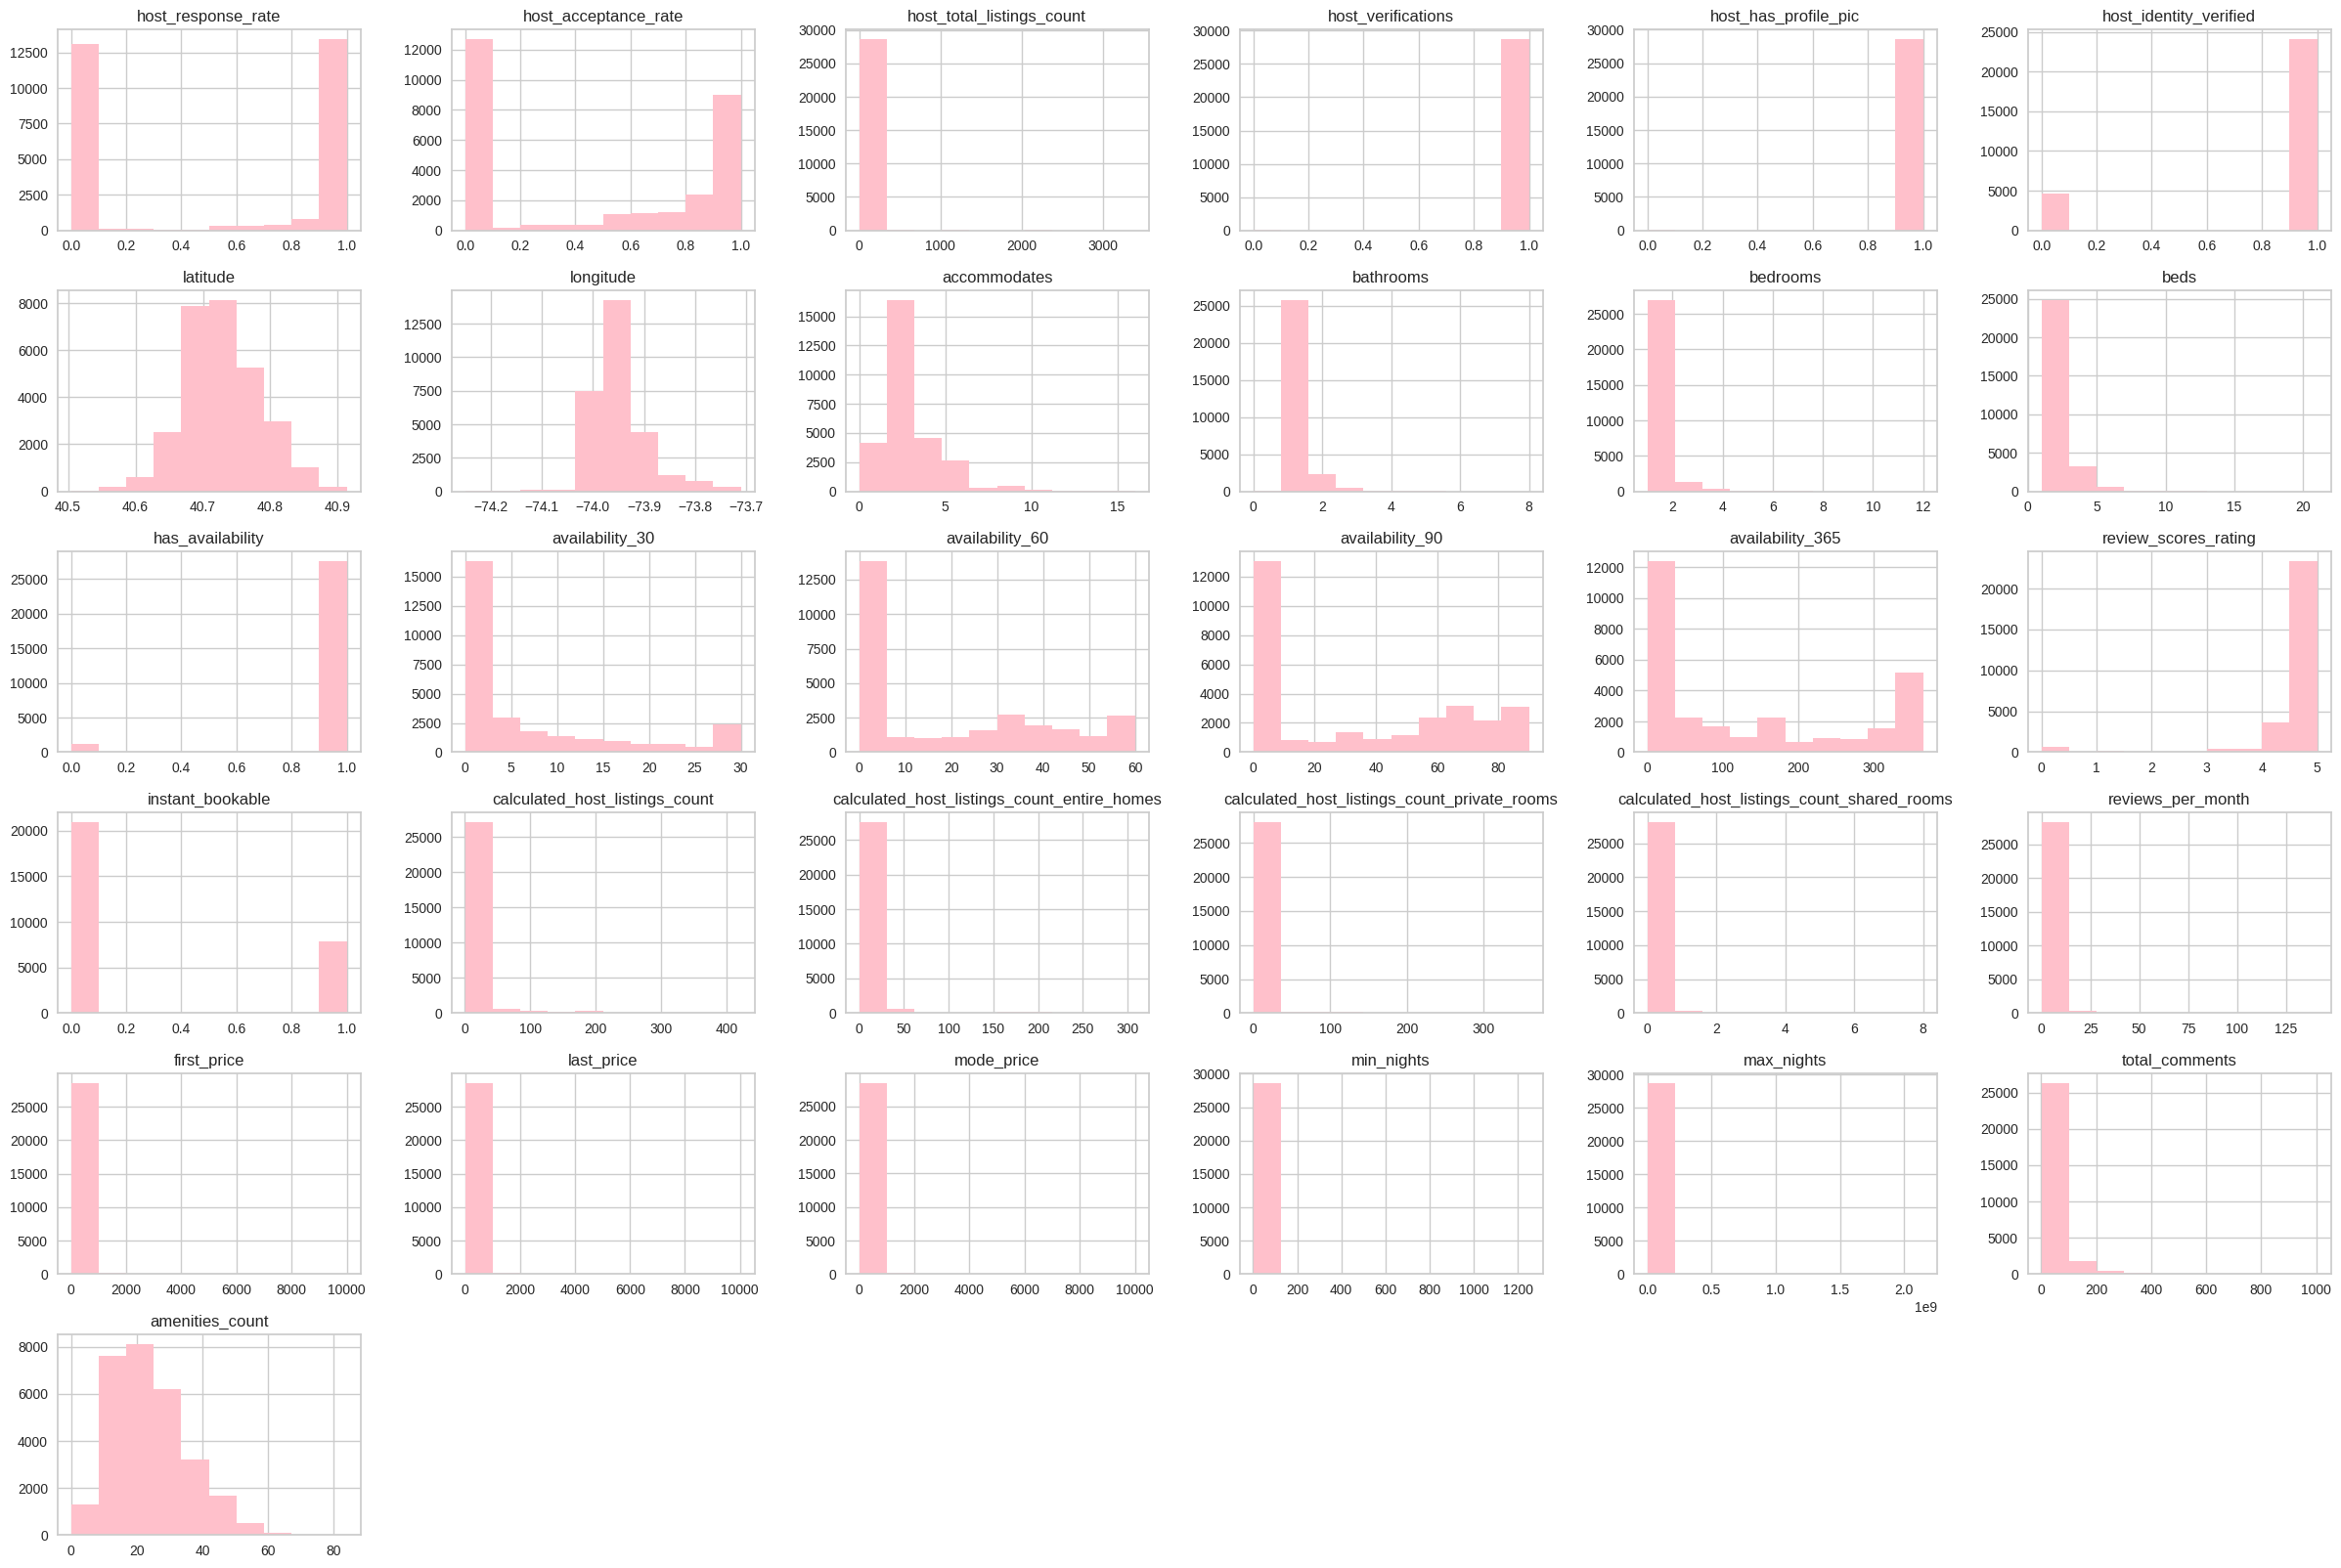

In [ ]:
df[varc].hist(figsize=(30,20), color='pink')

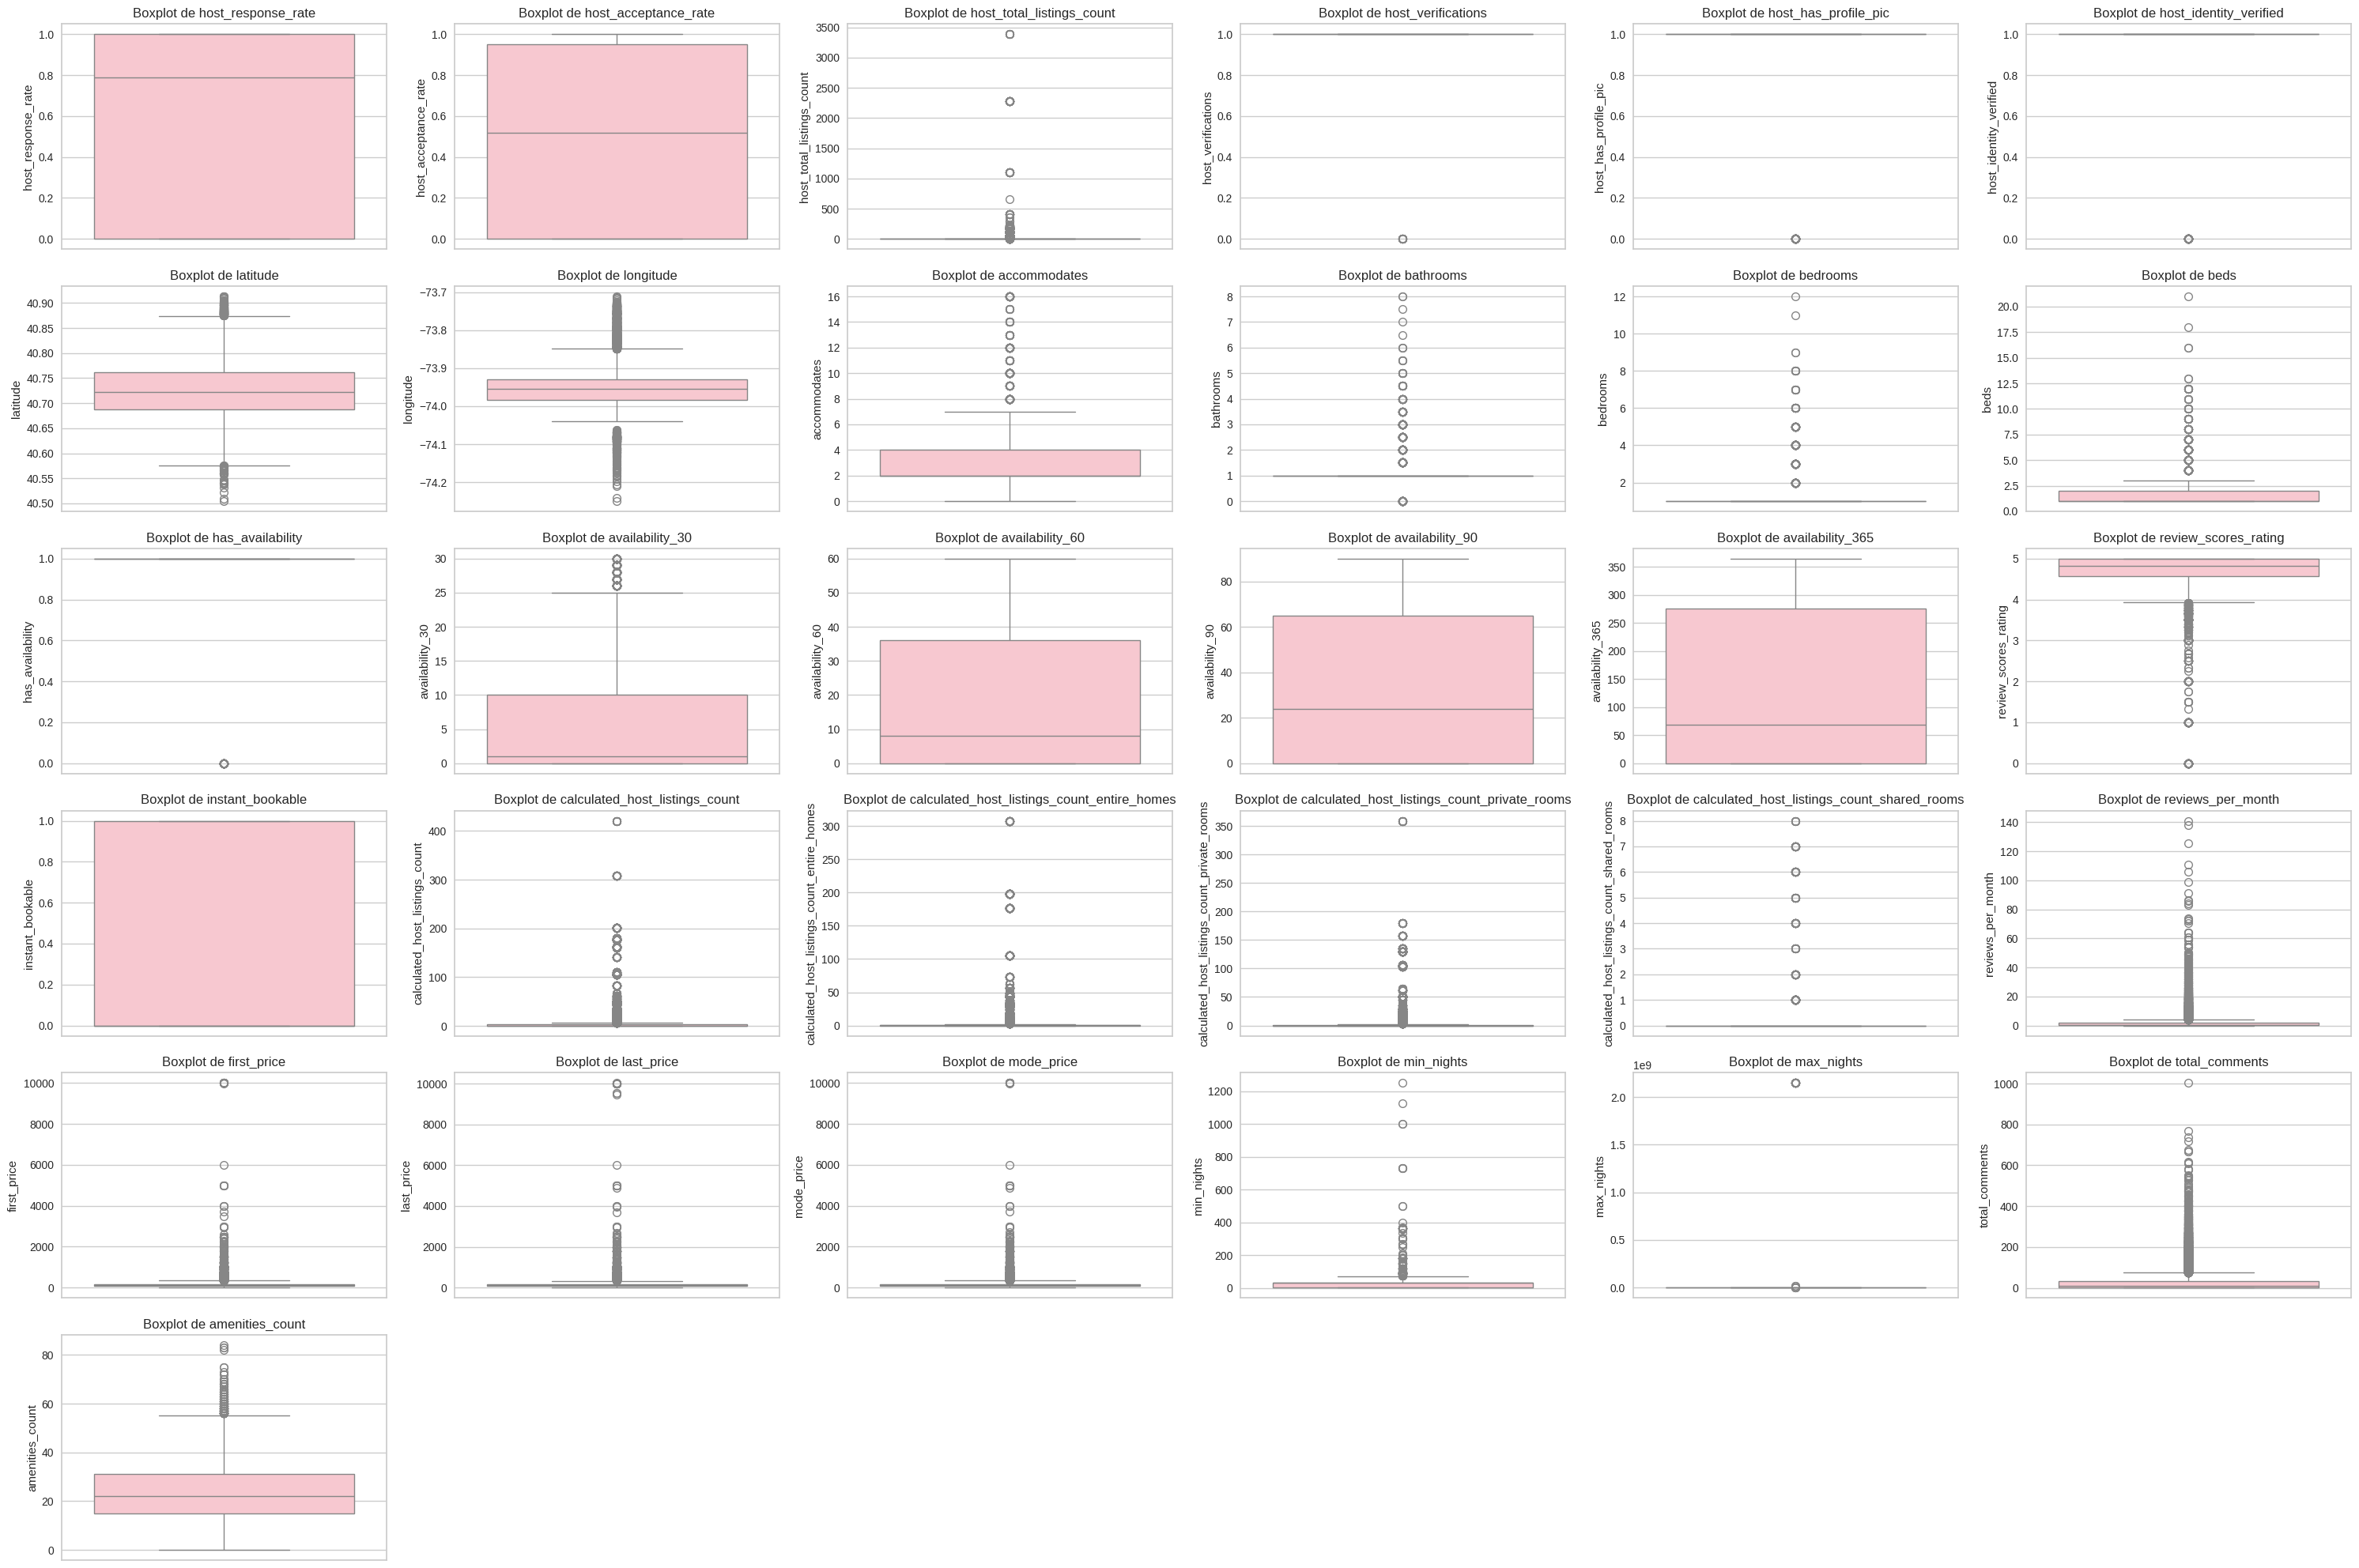

In [ ]:
plt.figure(figsize=(30, 20))
for i, col in enumerate(varc, 1):
    plt.subplot(6, 6, i)
    sns.boxplot(y=df[col], color='pink')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Variables a excluir del tratamiento con IQR por que son 0 y 1 y por contexto
excluir = ['host_response_rate', 'host_acceptance_rate', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'bathrooms', 'bedrooms',
           'has_availability', 'instant_bookable', 'longitude', 'latitude, ','calculated_host_listings_count_shared_rooms']
# Filtrar las variables continuas a tratar
varc_filtradas = [col for col in varc if col not in excluir]

# Aplicar IQR para tratar outliers
for col in varc_filtradas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df[col] = df[col].apply(lambda x: limite_inferior if x < limite_inferior else (limite_superior if x > limite_superior else x))

**Aplicamos IQR solo a ciertas variable y volvemos a verificar los graficos y vemos una mejora.**

array([[<Axes: title={'center': 'host_response_rate'}>,
        <Axes: title={'center': 'host_acceptance_rate'}>,
        <Axes: title={'center': 'host_total_listings_count'}>,
        <Axes: title={'center': 'host_verifications'}>,
        <Axes: title={'center': 'host_has_profile_pic'}>,
        <Axes: title={'center': 'host_identity_verified'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'accommodates'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'beds'}>],
       [<Axes: title={'center': 'has_availability'}>,
        <Axes: title={'center': 'availability_30'}>,
        <Axes: title={'center': 'availability_60'}>,
        <Axes: title={'center': 'availability_90'}>,
        <Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'review_scores_rating'}>],
       [<Axes: title={'center': 'instant_bo

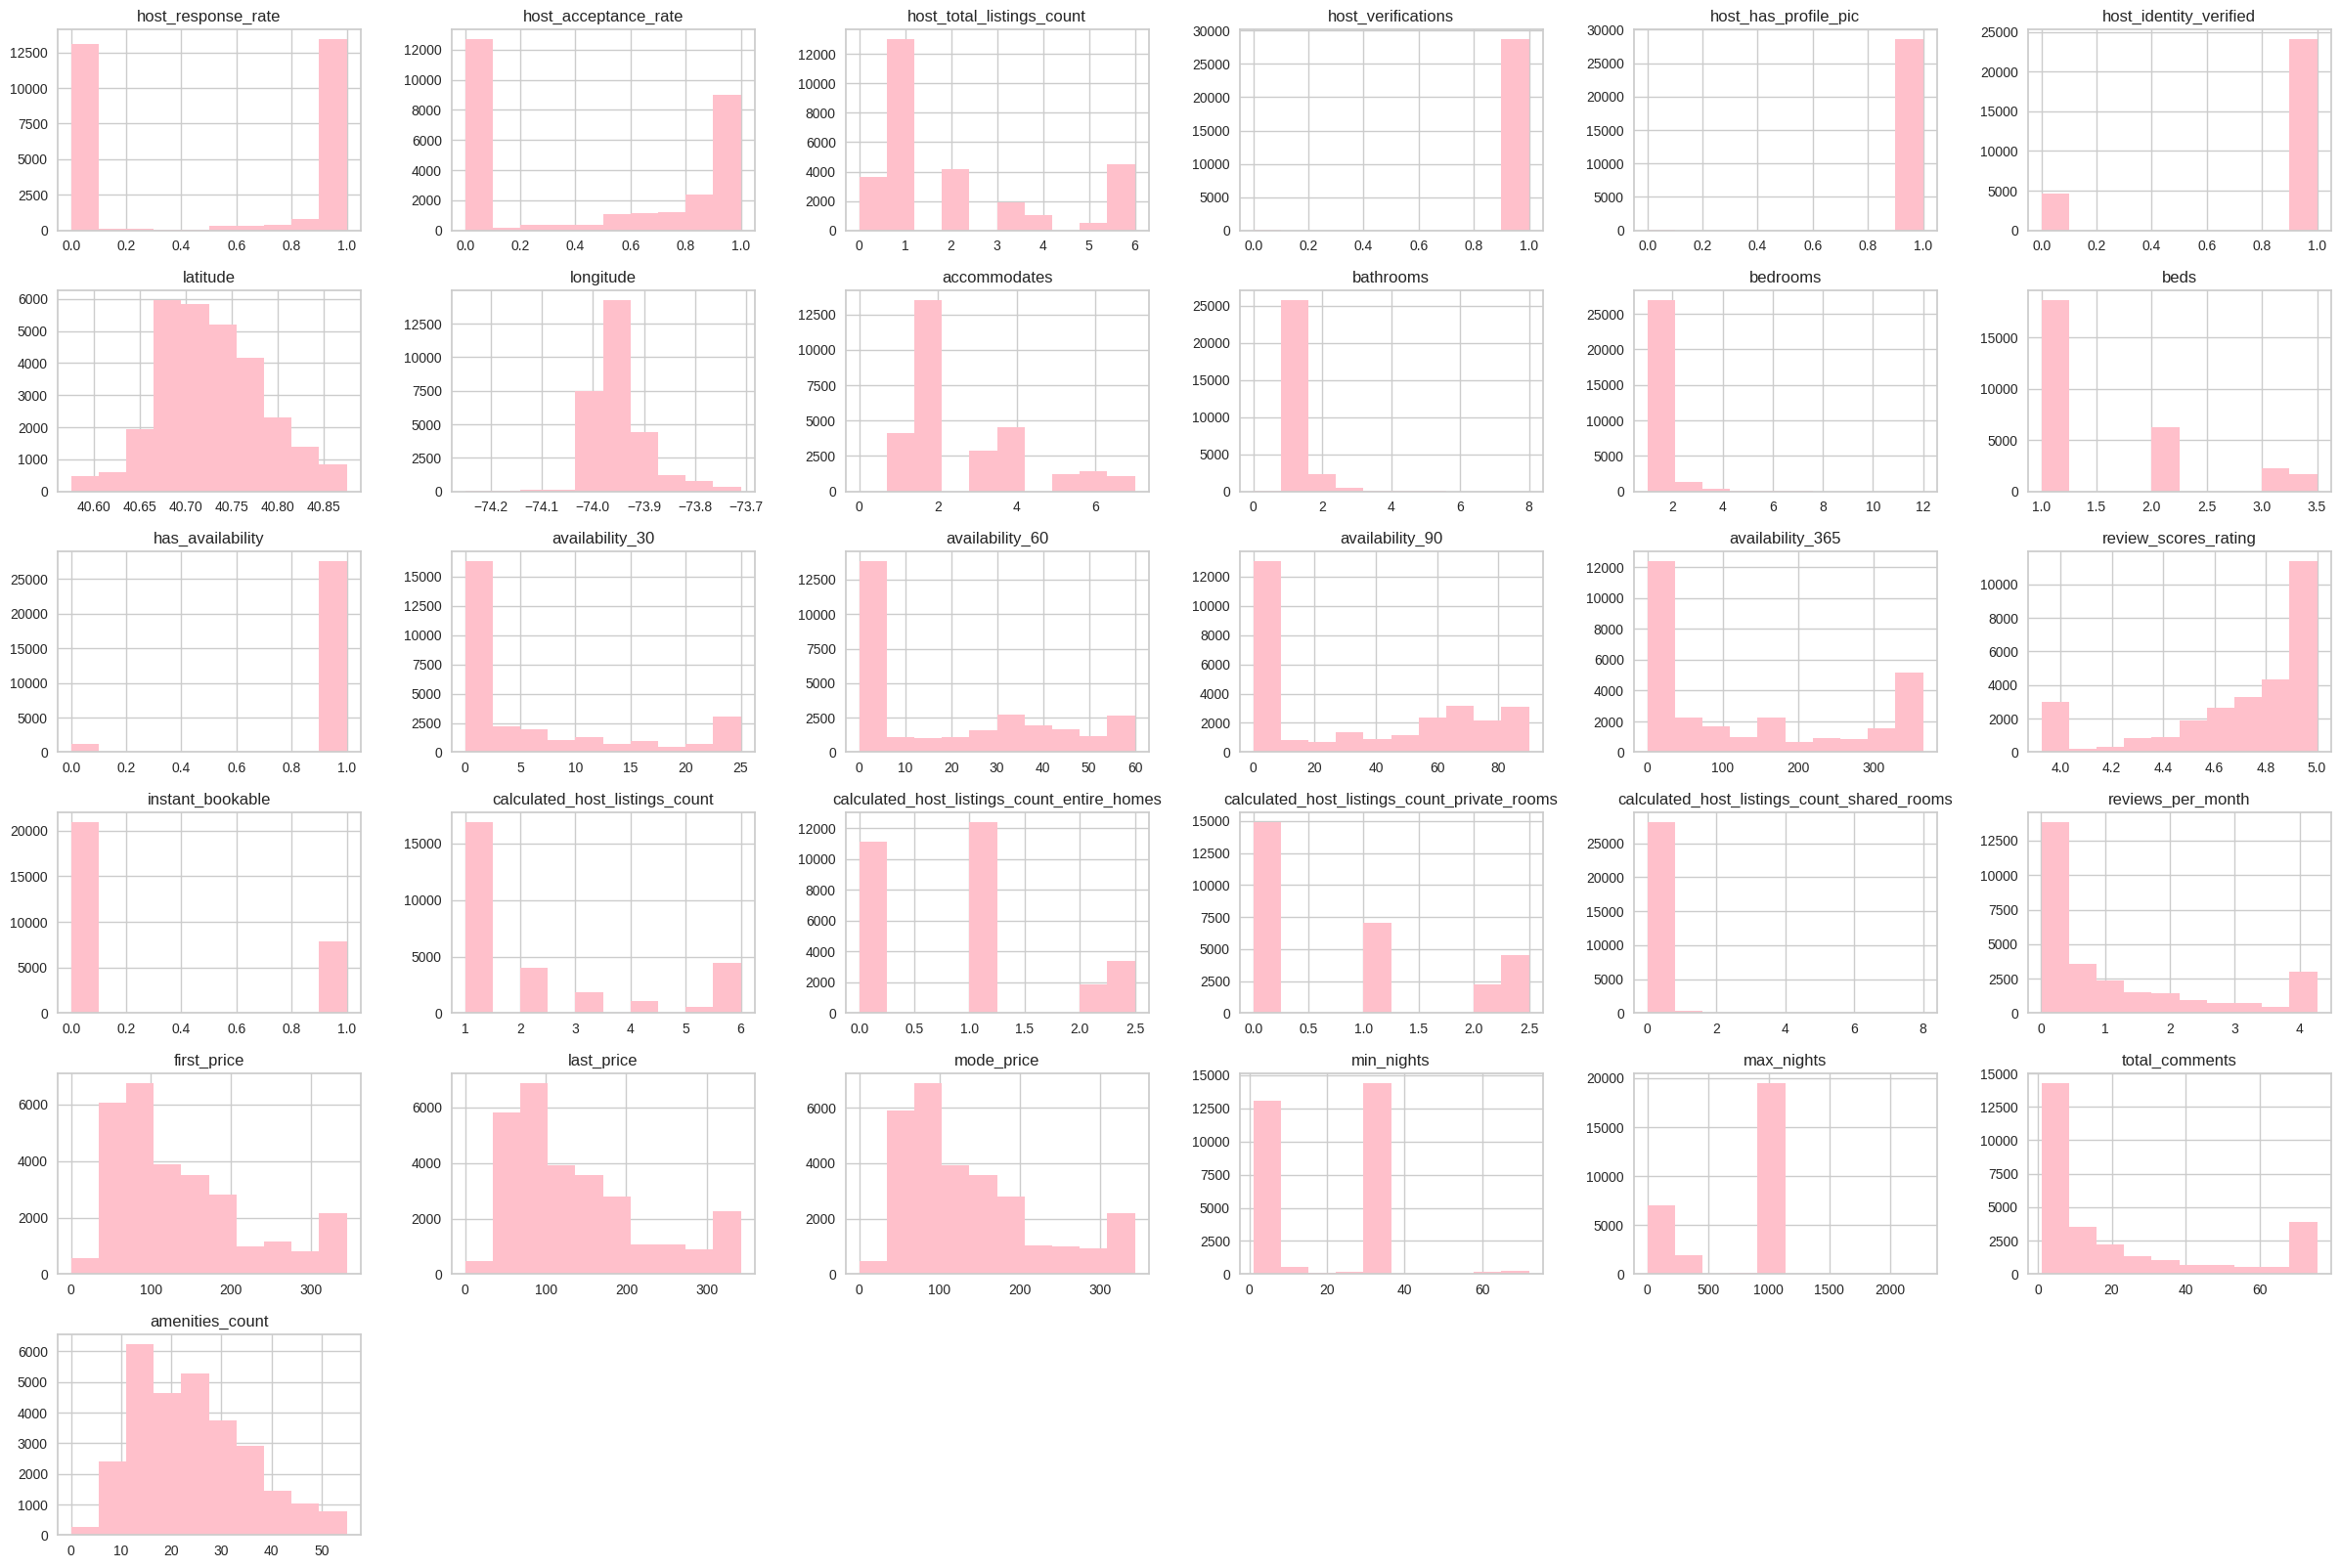

In [ ]:
df[varc].hist(figsize=(30,20), color='pink')

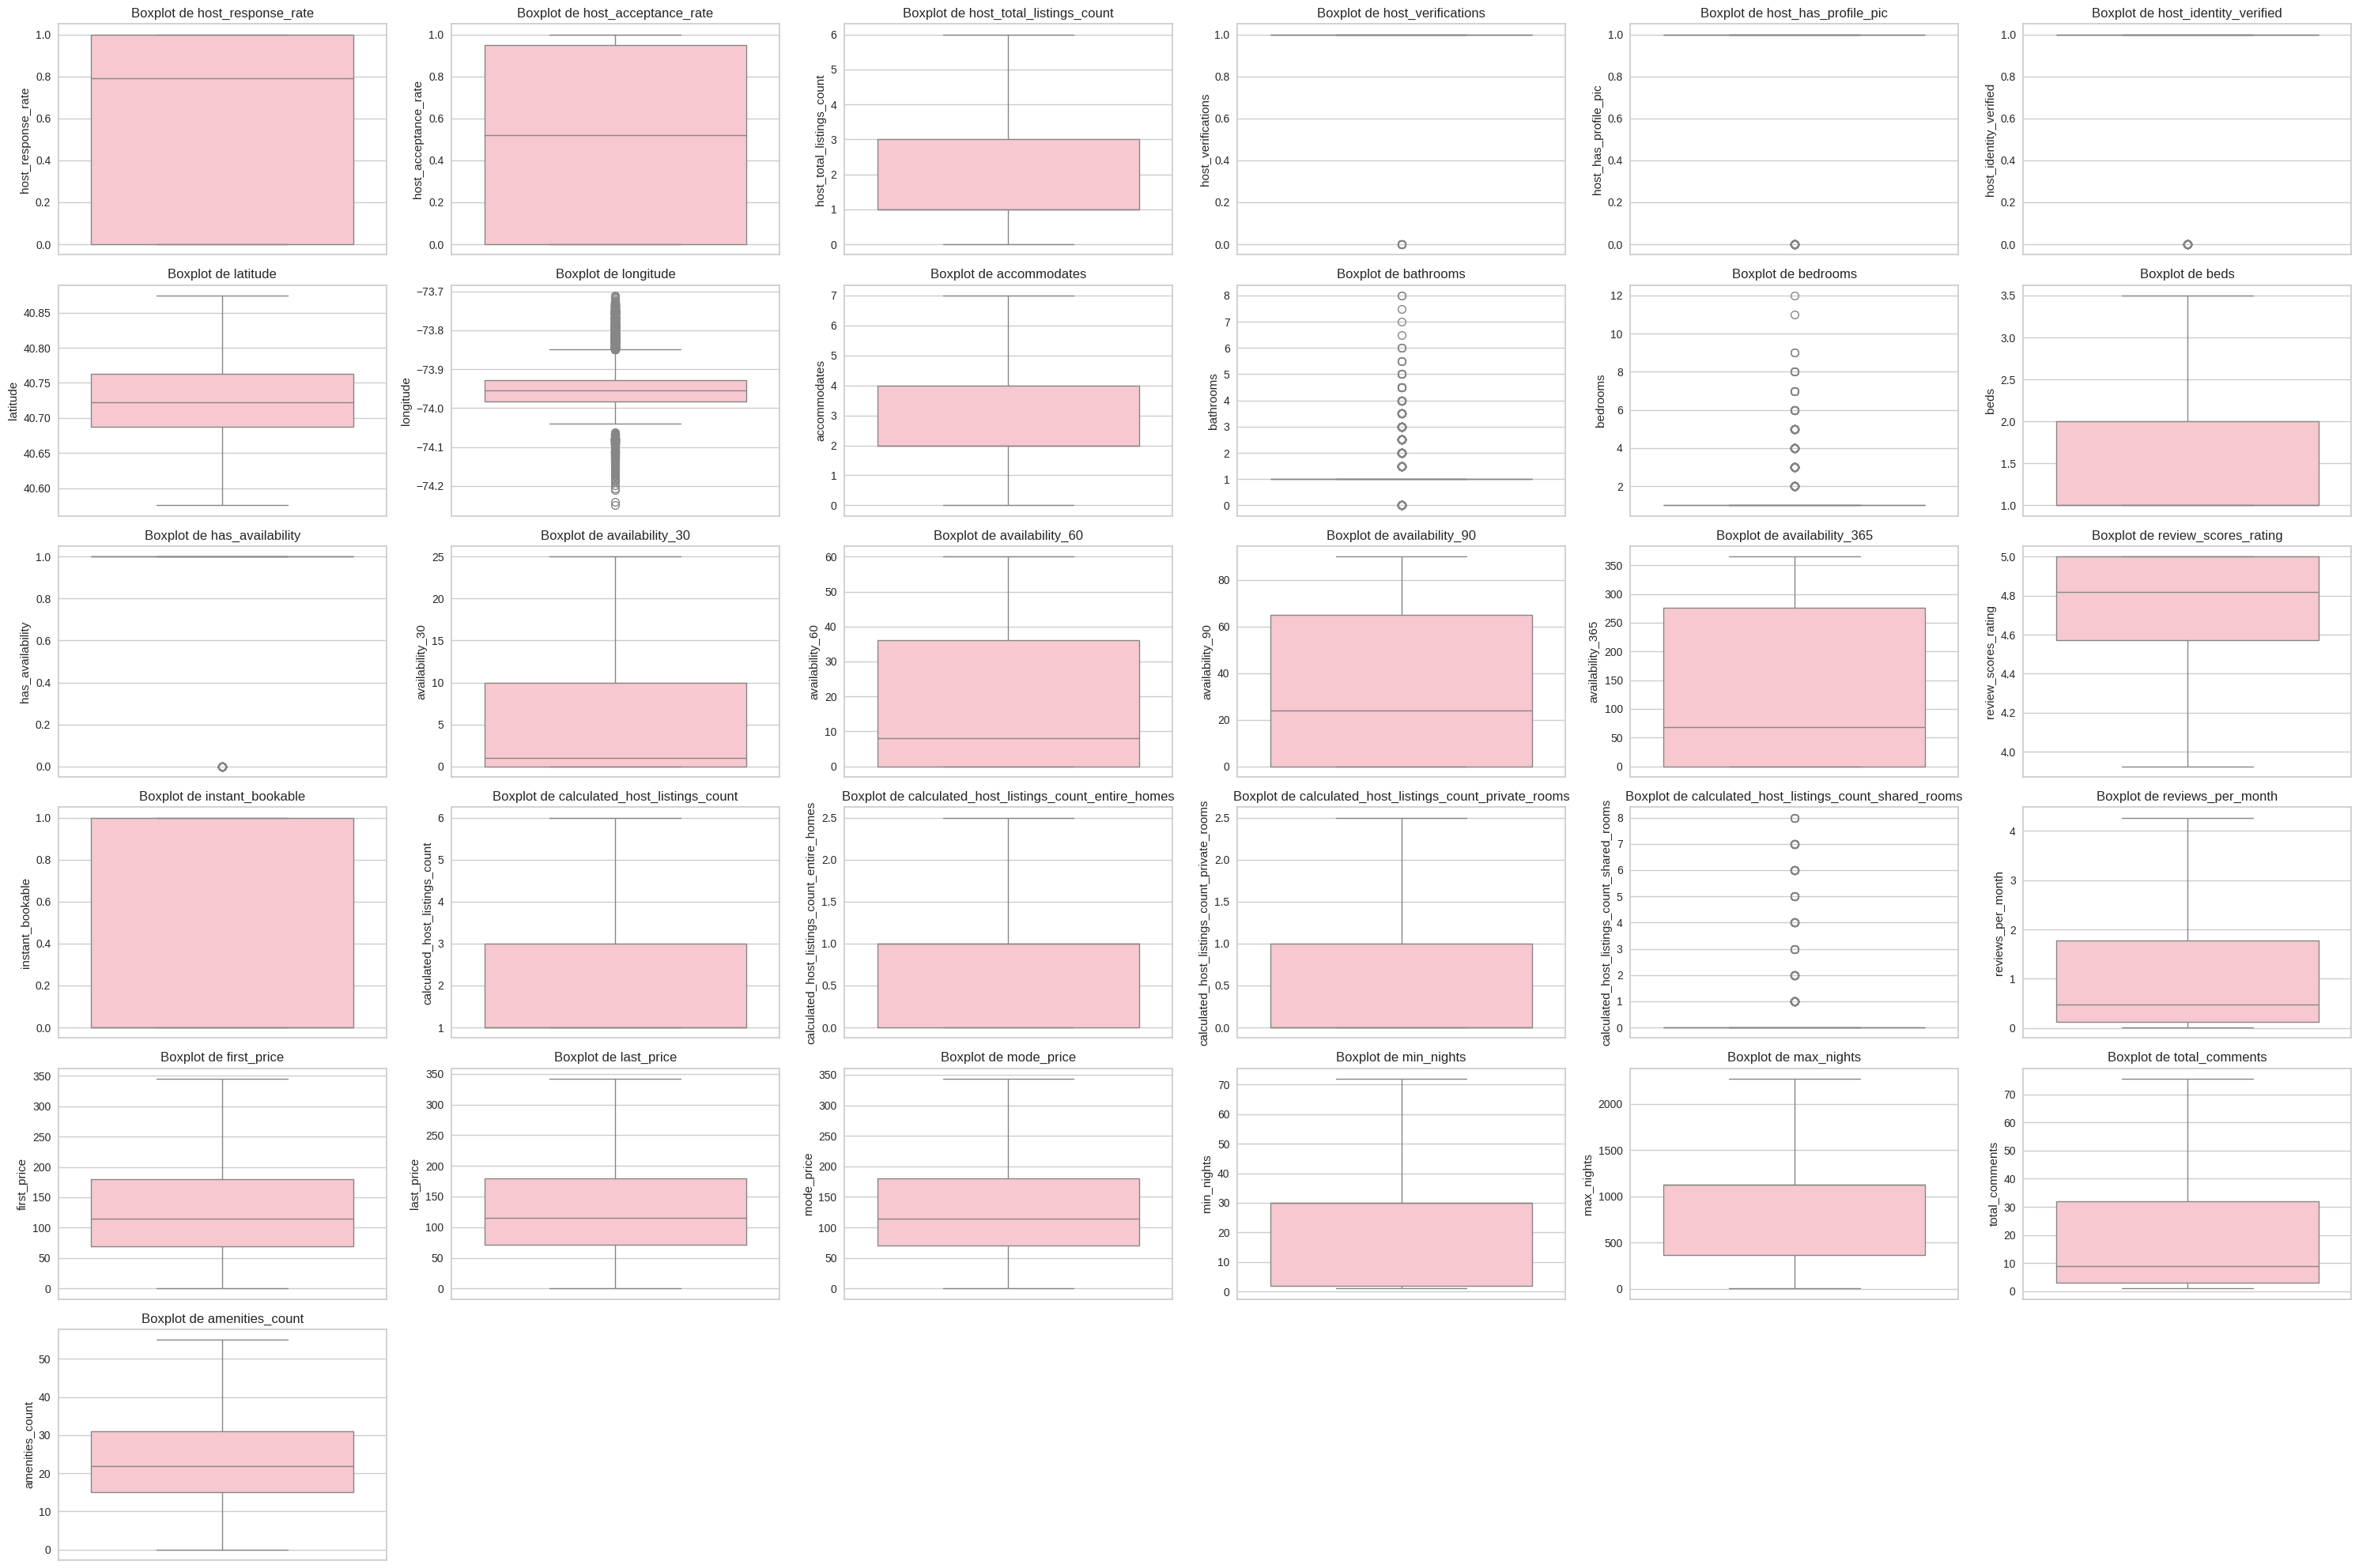

In [ ]:
plt.figure(figsize=(30, 20))
for i, col in enumerate(varc, 1):
    plt.subplot(6, 6, i)
    sns.boxplot(y=df[col], color='pink')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

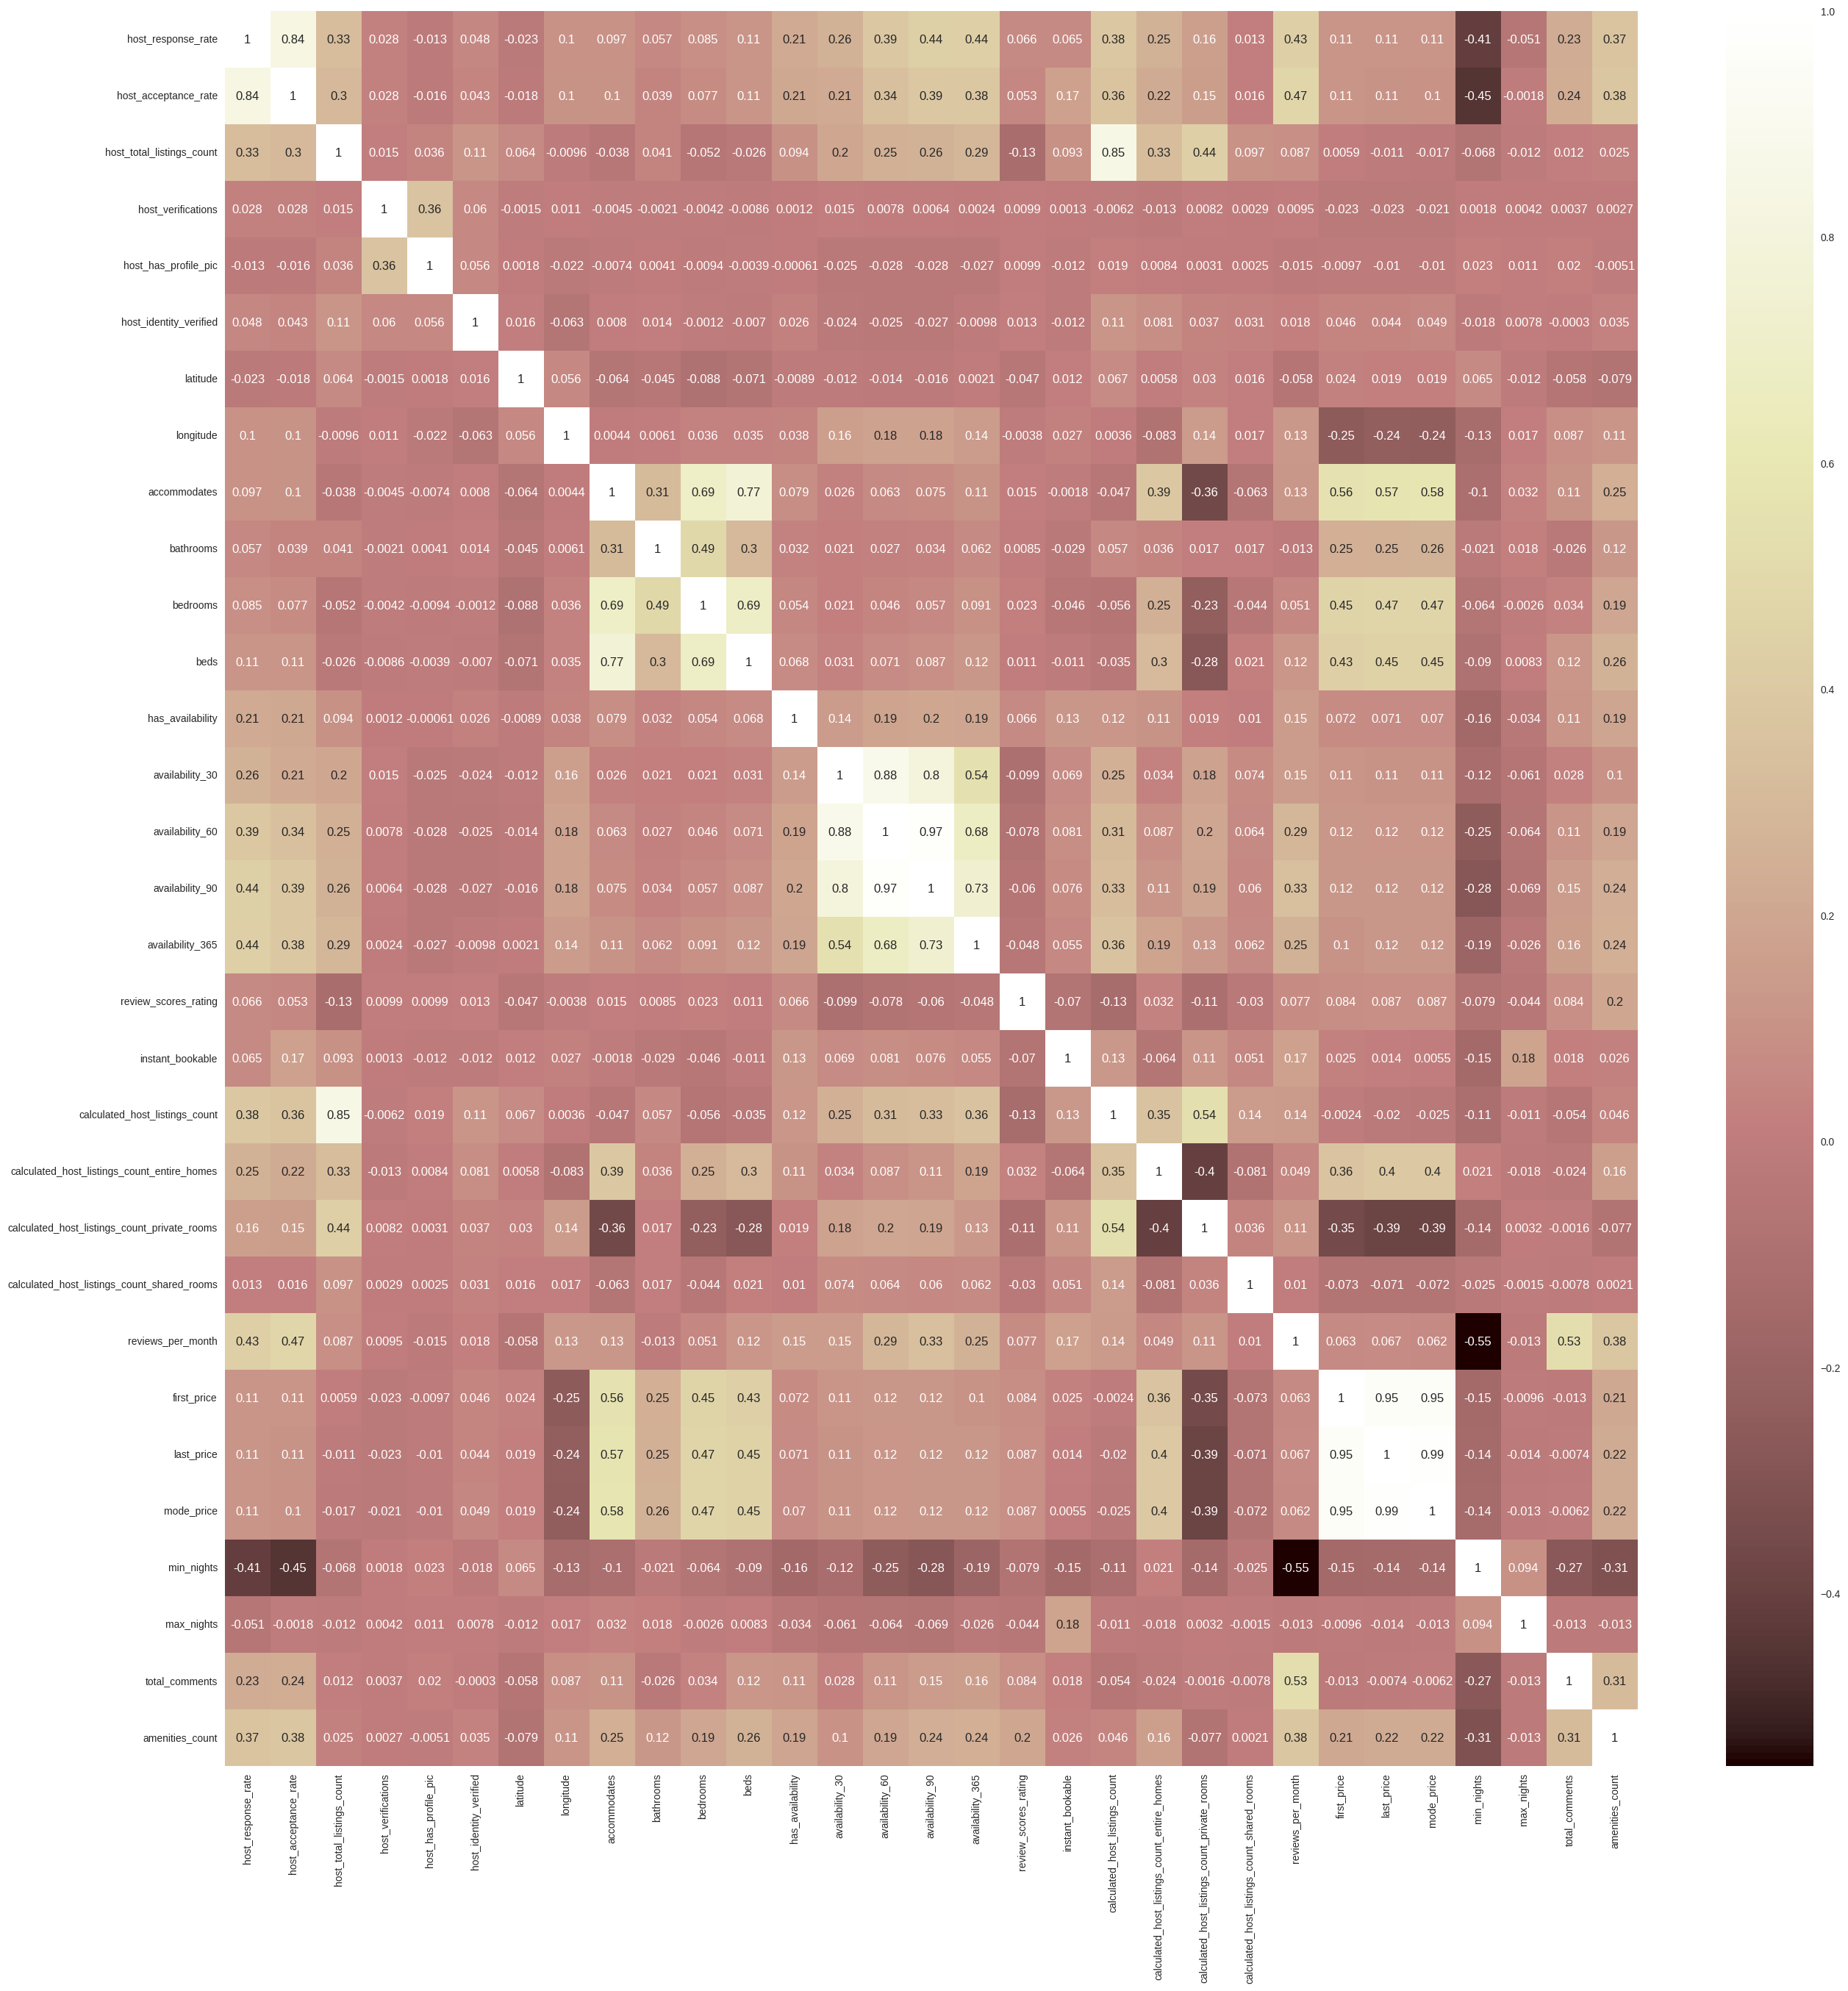

In [ ]:
#Verificamos la correlación para eliminar variables altamente correlacionadas
corr_matrix = df[varc].corr()
plt.figure(figsize=(len(varc), len(varc)))
sns.heatmap(corr_matrix, cmap="pink", annot=True)
plt.show

In [ ]:
#ver que variables estan altamente correlacionadas
high_corr_vars = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            high_corr_vars.append((colname_i, colname_j))

print("Variables con correlación mayor a 0.7 o menor a -0.7:")
for var in high_corr_vars:
    print(f"{var[0]} - {var[1]}")

Variables con correlación mayor a 0.7 o menor a -0.7:
host_response_rate - host_acceptance_rate
host_total_listings_count - calculated_host_listings_count
accommodates - beds
availability_30 - availability_60
availability_30 - availability_90
availability_60 - availability_90
availability_90 - availability_365
first_price - last_price
first_price - mode_price
last_price - mode_price


In [ ]:
#eliminamos las variables correlacionadas ya que tenemos en si la var general has_availability y eliminamos solo una de los primeros dos par de variables correlacionados
varc.remove('host_response_rate')
varc.remove('calculated_host_listings_count')
varc.remove('beds')
varc.remove('availability_30')
varc.remove('availability_60')
varc.remove('availability_90')
varc.remove('last_price')
varc.remove('first_price')


In [ ]:
varc

['host_acceptance_rate',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'has_availability',
 'availability_365',
 'review_scores_rating',
 'instant_bookable',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month',
 'mode_price',
 'min_nights',
 'max_nights',
 'total_comments',
 'amenities_count']

In [ ]:
df = df[varc + vard]

### Discretas

In [ ]:
for i in vard:
  df[i] = df[i].astype(str)

<ipython-input-107-d58700f7d3a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].astype(str)
<ipython-input-107-d58700f7d3a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].astype(str)
<ipython-input-107-d58700f7d3a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [ ]:
df.head(5)

host_acceptance_rate  host_total_listings_count  host_verifications  \
0                  0.17                        6.0                   1   
1                  0.69                        1.0                   1   
2                  1.00                        1.0                   1   
3                  0.25                        1.0                   1   
4                  1.00                        1.0                   1   

   host_has_profile_pic  host_identity_verified  latitude  longitude  \
0                     1                       1  40.75356  -73.98559   
1                     1                       1  40.68494  -73.95765   
2                     1                       1  40.68535  -73.95512   
3                     1                       1  40.66265  -73.99454   
4                     1                       0  40.76457  -73.98317   

   accommodates  bathrooms  bedrooms  ...  \
0           1.0        1.0       1.0  ...   
1           3.0        1.0       1.0  ...   
2           2.0        1.0       1.0  ...   
3           4.0        1.5       2.0  ...   
4           2.0        1.0       1.0  ...   

   calculated_host_listings_count_shared_rooms  reviews_per_month  mode_price  \
0                                            0               0.33       225.0   
1                                            0               4.27        76.0   
2                                            0               0.52        60.0   
3                                            0               0.02       275.0   
4                                            0               3.68        68.0   

   min_nights  max_nights  total_comments  amenities_count  \
0        30.0      1125.0            48.0             31.0   
1         1.0       730.0            75.5             35.0   
2        30.0       730.0            50.0              5.0   
3         5.0      1125.0             2.0             14.0   
4         2.0        14.0            75.5             25.0   

   host_response_time        room_type  type_host  
0        within a day  Entire home/apt   Old user  
1  a few days or more  Entire home/apt   Old user  
2      within an hour     Private room   Old user  
3        within a day  Entire home/apt   Old user  
4        within a day     Private room   Old user  

[5 rows x 26 columns]

In [ ]:
def freq(df, var):

    if type(var) != list:
        var = [var]

    for v in var:
        aux = df[v].value_counts().to_frame().rename(columns = {"count":"FA"})
        aux["FR"] = aux["FA"]/sum(aux["FA"])
        aux["FAA"] = aux["FA"].cumsum()
        aux["FRA"] = aux["FR"].cumsum()
        print(f"Frecuencias para la variable {v} \n" )
        display(aux)
        plt.show()
        print("\n")

In [ ]:
freq(df, vard)

Frecuencias para la variable host_response_time 



FA        FR    FAA       FRA
host_response_time                                  
A stranger          12454  0.433122  12454  0.433122
within an hour       9226  0.320860  21680  0.753982
within a few hours   3679  0.127947  25359  0.881929
within a day         2385  0.082945  27744  0.964874
a few days or more   1010  0.035126  28754  1.000000



Frecuencias para la variable room_type 



FA        FR    FAA       FRA
room_type                                        
Entire home/apt  15932  0.554079  15932  0.554079
Private room     12281  0.427106  28213  0.981185
Shared room        393  0.013668  28606  0.994853
Hotel room         148  0.005147  28754  1.000000



Frecuencias para la variable type_host 



FA        FR    FAA       FRA
type_host                                        
User             14761  0.513355  14761  0.513355
Old user          7687  0.267337  22448  0.780691
New user          6286  0.218613  28734  0.999304
Sin información     20  0.000696  28754  1.000000

In [ ]:
#vemos si hay variables unarias
unarias = [v for v, conteo in zip(vard, [df[v].unique().shape[0] for v in vard]) if conteo == 1]
unarias

[]

In [ ]:
vard = [v for v in vard if v not in unarias]

In [ ]:
df_original = df.copy()

#####Convertir discretas a continuas



In [ ]:
frecuencias = {f'frec_{v}':df[v].value_counts() for v in vard}

for v in ['host_response_time', 'room_type', 'type_host']:
    df[f'frec_{v}'] = df[v].map(frecuencias[f'frec_{v}'])

In [ ]:
var_frec = df.filter(like='frec').columns.tolist()
df = df[var_frec + varc]

In [ ]:
df[var_frec]

frec_host_response_time  frec_room_type  frec_type_host
0                         2385           15932            7687
1                         1010           15932            7687
2                         9226           12281            7687
3                         2385           15932            7687
4                         2385           12281            7687
...                        ...             ...             ...
28749                     9226           12281            6286
28750                     9226           15932           14761
28751                     9226           12281            6286
28752                     9226           15932            7687
28753                    12454           12281            6286

[28754 rows x 3 columns]

#Escalamiento

Escalamos el conjunto ya que hay variables que provienen de distintas cosas y no tienen una escala en comun

In [ ]:
df = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)

#Reducción de dimensiones

## PCA

Text(0, 0.5, 'Varianza Explicada')

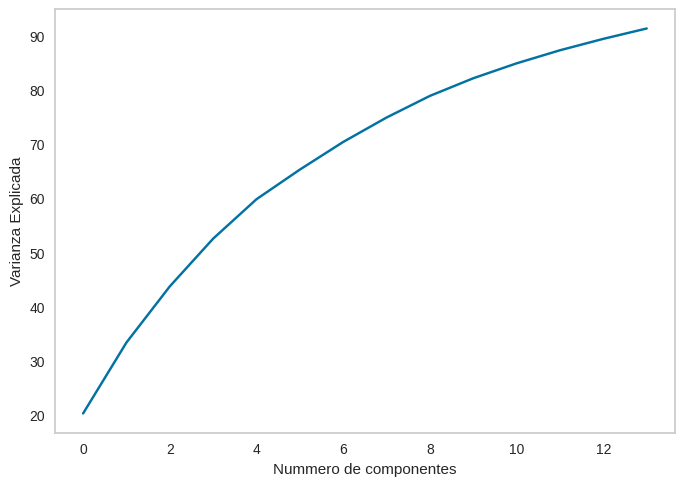

In [ ]:
pca_16 = PCA(n_components=14)
pca_16.fit(df)

plt.grid()
plt.plot(np.cumsum(pca_16.explained_variance_ratio_ * 100))
plt.xlabel('Nummero de componentes')
plt.ylabel('Varianza Explicada')

Observamos que al usar 9 componentes la varianza explicada esta entre el 70 y 80% si usamos mas de 10 componentes la varianza exlicada estara entre el 80 y 90%

In [ ]:
varianza_explicada_acumulada = np.cumsum(pca_16.explained_variance_ratio_ * 100)
print(f'La varianza explicada correspondiente a usar 10 componentes es: {varianza_explicada_acumulada[10]}')

La varianza explicada correspondiente a usar 10 componentes es: 84.84435828544684


In [ ]:
pca_10 = PCA(n_components=10)
pca_10.fit(df)

df_pca_10 = pd.DataFrame(pca_10.transform(df), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

In [ ]:
pca_2 = PCA(n_components=2)
pca_2.fit(df)

df_pca_2 = pd.DataFrame(pca_2.transform(df), columns=['PC1', 'PC2'])

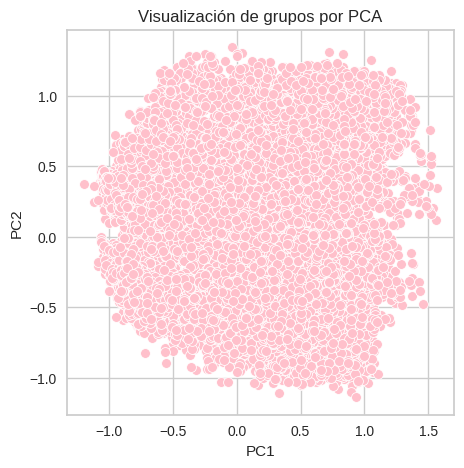

In [ ]:
plt.figure(figsize=(5,5))
sp = sns.scatterplot(x='PC1', y='PC2', s=50, data=df_pca_2, color='pink').set_title("Visualización de grupos por PCA")

## TSNE

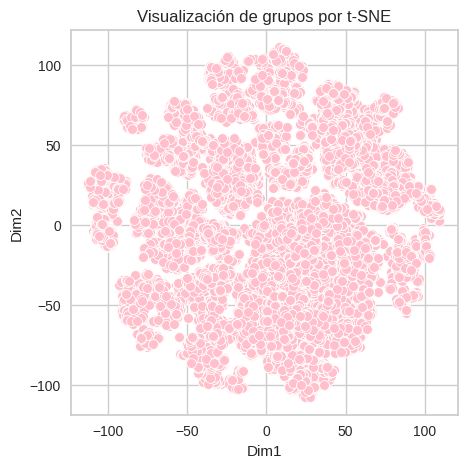

In [ ]:
tsne_2 = TSNE(n_components=2, random_state=42, perplexity=30)
df_tsne_2 = pd.DataFrame(tsne_2.fit_transform(df), columns=['Dim1', 'Dim2'])

plt.figure(figsize=(5, 5))
sns.scatterplot(x='Dim1', y='Dim2', s=50, data=df_tsne_2, color='pink').set_title("Visualización de grupos por t-SNE")
plt.show()


In [ ]:
#pca_2_kpca = KernelPCA(n_components=2, kernel='rbf')
#pca_2_kpca.fit(df)

#df_kpca_2 = pd.DataFrame(pca_2_kpca.transform(df), columns=['PC1', 'PC2'])

In [ ]:
#plt.figure(figsize=(5,5))
#sp = sns.scatterplot(x='PC1', y='PC2', s=50, data=df_kpca_2, color='pink').set_title("Visualización de grupos por Kernel PCA")

#Número de cluster minimo

### CODO - KMeans

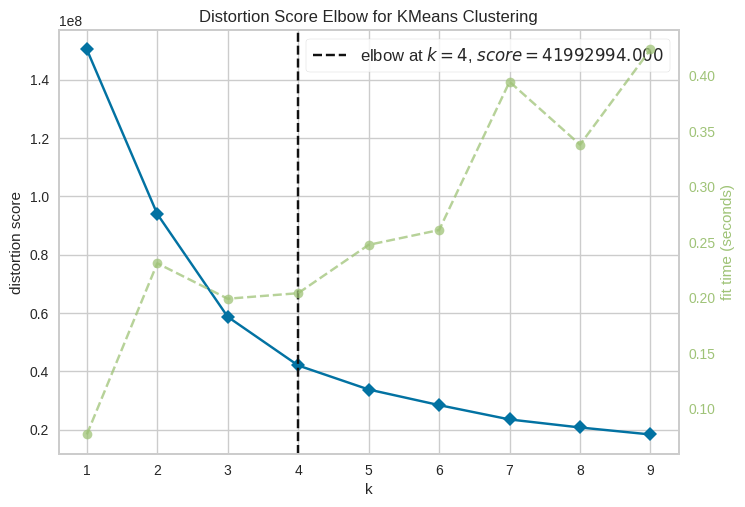

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(init='k-means++', max_iter=50, n_init=10)
visualizer = KElbowVisualizer(model, k=(1,10)).fit(df_tsne_2)
visualizer.show()

**nos indica que el numero optimo seria 3 usando el codo en Kmeans**

### Silueta - K-MEANS & GMM

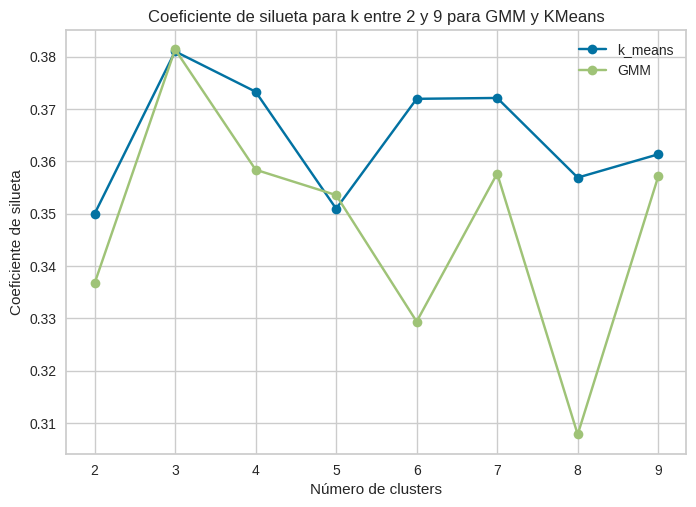

In [ ]:
silueta_kmeans = []
for k in list(range(2,10)):
    model = KMeans(n_clusters=k, init='k-means++', max_iter=50, n_init=10)
    model.fit(df_tsne_2)
    labels = model.fit_predict(df_tsne_2)
    score = silhouette_samples(df_tsne_2, labels)
    score_avg = silhouette_score(df_tsne_2, labels)
    silueta_kmeans.append(score_avg)

plt.plot(range(2,10), silueta_kmeans, 'bo-', label='k_means')

silueta_gmm = []
for k in list(range(2,10)):
    model = GMM(n_components=k, max_iter=100, n_init=10)
    model.fit(df_tsne_2)
    labels = model.fit_predict(df_tsne_2)
    score = silhouette_samples(df_tsne_2, labels)
    score_avg = silhouette_score(df_tsne_2, labels)
    silueta_gmm.append(score_avg)

plt.plot(range(2,10), silueta_gmm, 'go-', label='GMM')

plt.xlabel('Número de clusters')
plt.ylabel('Coeficiente de silueta')
plt.title('Coeficiente de silueta para k entre 2 y 9 para GMM y KMeans')
plt.legend()

**Observamos que tanto Kmeans como GMM nos indica que el punto maximo es 3**

N Clusters : 2
Score Silueta : 0.16


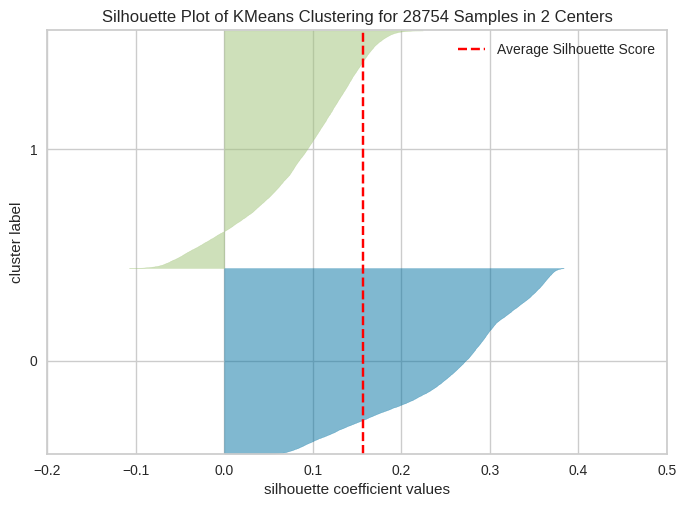

N Clusters : 3
Score Silueta : 0.16


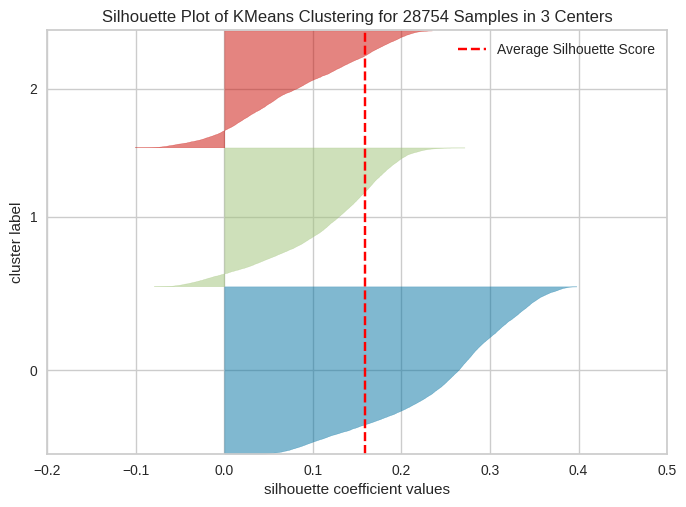

N Clusters : 4
Score Silueta : 0.15


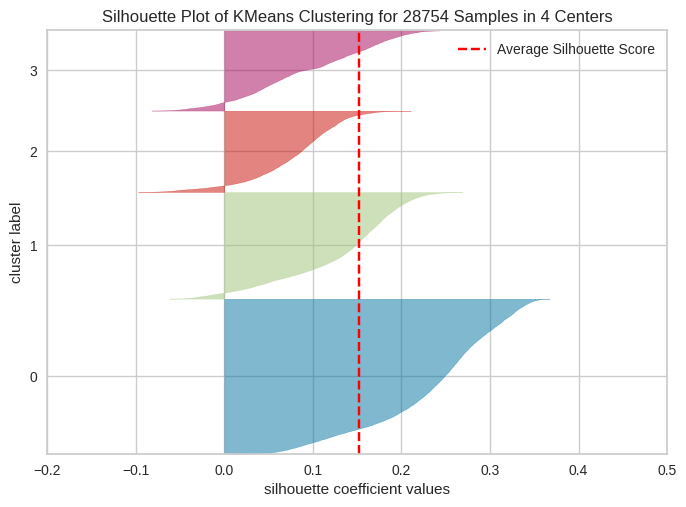

N Clusters : 5
Score Silueta : 0.15


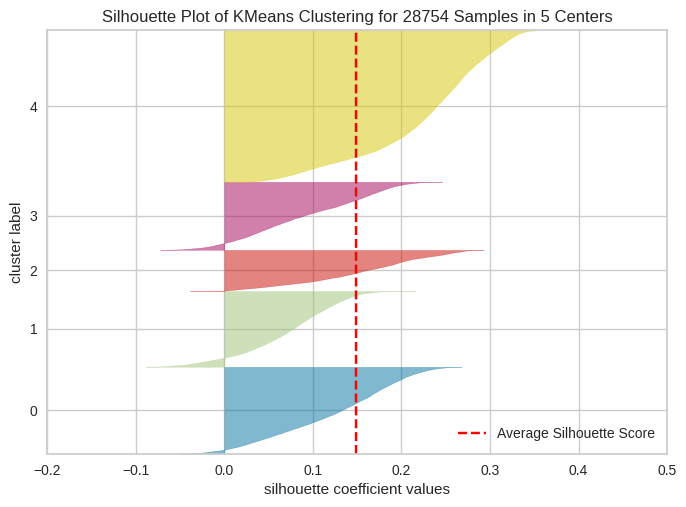

N Clusters : 6
Score Silueta : 0.15


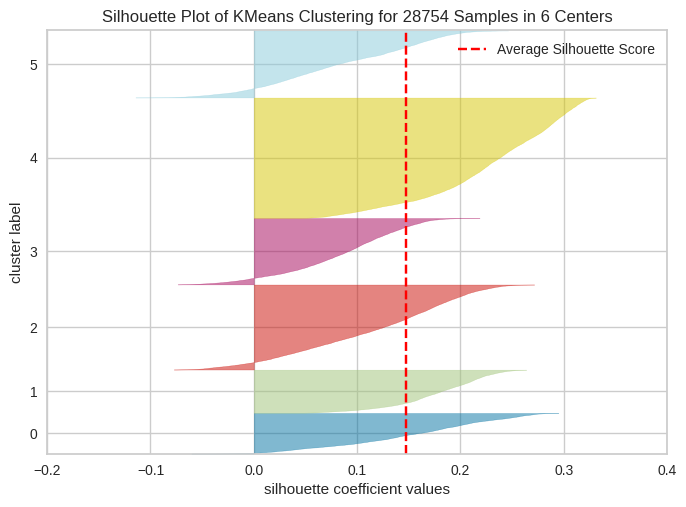

N Clusters : 7
Score Silueta : 0.15


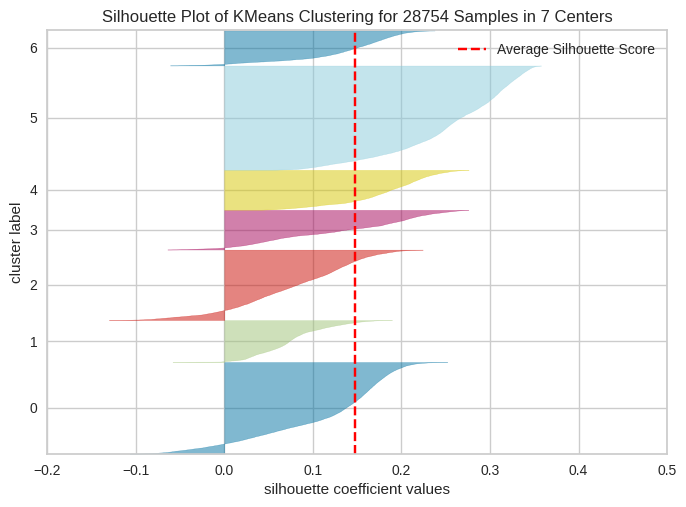

In [ ]:
for i in range(2,8):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=50, n_init=10)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
    visualizer.fit(df)
    print(f"N Clusters : {i}")
    print(f"Score Silueta : {round(visualizer.silhouette_score_,2)}")
    visualizer.show()

**Con la silueta vemos que sigue apoyando que el numero optimo de cluster es 3**

### CALINSKI

GMM

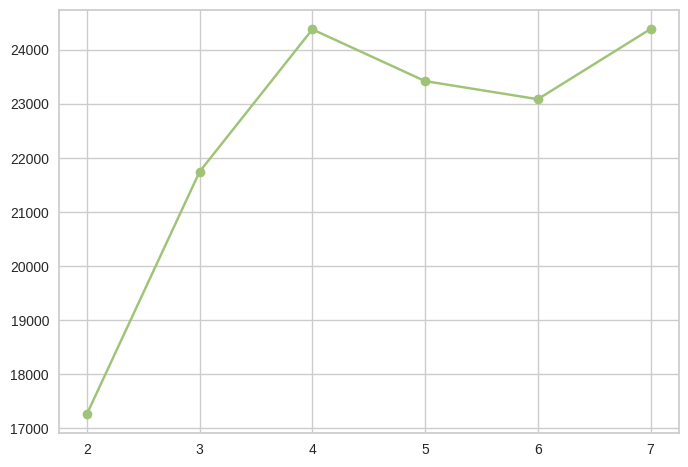

In [ ]:
calinski_gmm = []
for k in list(range(2, 8)):
    model = GMM(n_components=k, random_state=42)
    model.fit(df_tsne_2)
    labels = model.fit_predict(df_tsne_2)
    score = calinski_harabasz_score(df_tsne_2,labels)
    calinski_gmm.append(score)

plt.plot(range(2,8), calinski_gmm, 'go-', label='GMM')

**Observamos para GMM usando CALINSKI el punto más alto es decir tienen una mejor separación es el cluster 4**

KMEANS

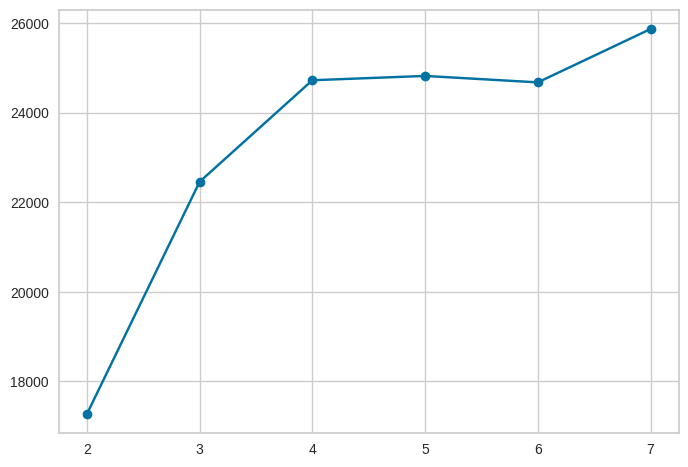

In [ ]:
calinski_kmeans = []
for k in list(range(2, 8)):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=50, n_init=10)
    km.fit(df_tsne_2)
    labels = km.fit_predict(df_tsne_2)
    score = calinski_harabasz_score(df_tsne_2,labels)
    calinski_kmeans.append(score)

plt.plot(range(2,8), calinski_kmeans, 'bo-', label="k-means")

**Observamos para Kmeans usando CALINSKI el punto más altoesta en el cluster 4 o 7**

#Clustering

### K MEANS

**Iniciamos con 3 cluster, pero despues de pruebas el mejor cluster fue el 3**

In [ ]:
k_means=KMeans(n_clusters=3, init='k-means++', max_iter=50, n_init=10,random_state=210)
k_means.fit(df_tsne_2)
df_tsne_2['cl_kmeans']=k_means.labels_

In [ ]:
score_avg = silhouette_score(df_tsne_2, df_tsne_2['cl_kmeans'])
print(f"Score Silueta : {round(score_avg,2)}")

Score Silueta : 0.38


In [ ]:
df_tsne_2['cl_kmeans'].value_counts(1)

cl_kmeans
1    0.365966
0    0.336788
2    0.297246
Name: proportion, dtype: float64

In [ ]:
fig = px.scatter(df_tsne_2, x='Dim1', y='Dim2', color='cl_kmeans',
                 color_continuous_scale='Peach',title = 'K-Means Clustering ').update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)', width=800, height=800)
fig

### DBSCAN

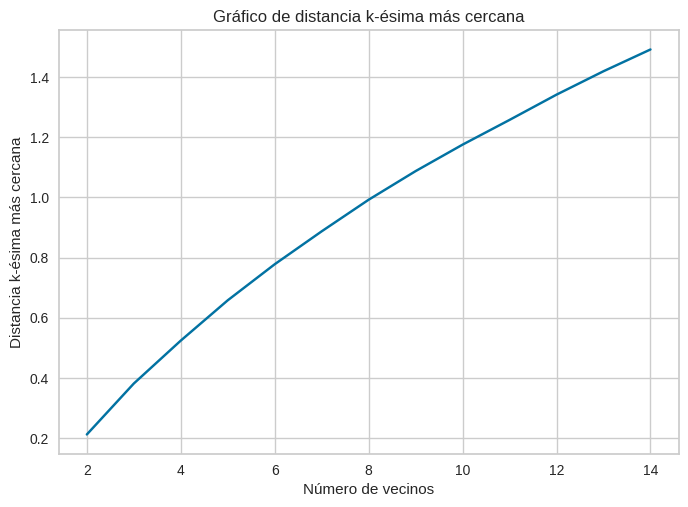

In [ ]:
## Num optimo de n_neighbors
n_neighbors = range(2, 15)
distances = []
for k in n_neighbors:
    neigh = NearestNeighbors(n_neighbors=k)
    nbrs = neigh.fit(df_tsne_2[['Dim1', 'Dim2']])
    distances.append(np.mean(nbrs.kneighbors(df_tsne_2[['Dim1', 'Dim2']])[0][:, -1]))

plt.plot(n_neighbors, distances)
plt.xlabel('Número de vecinos')
plt.ylabel('Distancia k-ésima más cercana')
plt.title('Gráfico de distancia k-ésima más cercana')
plt.show()

In [ ]:
# Num optimo de eps
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(df_tsne_2[['Dim1', 'Dim2']])
distancias,_ = nbrs.kneighbors(df_tsne_2[['Dim1', 'Dim2']])
distancias = np.sort(distancias, axis=0)
distancias = distancias[:,1]
aux=pd.DataFrame()
aux["distancias"]=sorted(list(distancias),reverse=False)
aux["index"]=range(len(distancias))
fig = px.line(aux, x="index", y="distancias", title="Valor óptimo de Epsilon")
fig.show()

In [ ]:
dbscan=DBSCAN()
dbscan.fit(df_tsne_2[['Dim1', 'Dim2']])
dbscan_opt=DBSCAN(eps=0.91	,min_samples=9)
dbscan_opt.fit(df_tsne_2[['Dim1', 'Dim2']])
df_tsne_2['cl_dbscan'] = dbscan_opt.labels_

In [ ]:
score_avg = silhouette_score(df_tsne_2, df_tsne_2['cl_dbscan'])
print(f"Score Silueta : {round(score_avg,2)}")

Score Silueta : 0.3


In [ ]:
df_tsne_2['cl_dbscan'].value_counts()

cl_dbscan
-1      10544
 46       114
 239      109
 158      105
 128       98
        ...  
 799        6
 661        6
 855        6
 845        6
 861        5
Name: count, Length: 876, dtype: int64

In [ ]:
fig2 = px.scatter(df_tsne_2, x='Dim1', y='Dim2', color_continuous_scale='Peach',title = 'DBSCAN Clustering',
            color='cl_dbscan').update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)', width=800, height=800)
fig2

### GMM

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gmm = GMM(n_components=3).fit(df_tsne_2)
labels_gmm = gmm.predict(df_tsne_2)
df_tsne_2['cl_gmm'] = labels_gmm

In [ ]:
score_avg = silhouette_score(df_tsne_2, df_tsne_2['cl_gmm'])
print(f"Score Silueta : {round(score_avg,2)}")

Score Silueta : 0.31


In [ ]:
df_tsne_2['cl_gmm'].value_counts(1)

cl_gmm
1    0.366697
0    0.328580
2    0.304723
Name: proportion, dtype: float64

In [ ]:
fig = px.scatter(df_tsne_2, x='Dim1', y='Dim2', color='cl_gmm',
                 color_continuous_scale='Peach',title = 'GMM Clustering ').update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)', width=800, height=800)
fig

**Poor obvias razones en visualización se decidio quedarnos con el modelo de  KMeans**

In [ ]:
df_tsne_2

Dim1       Dim2  cl_kmeans  cl_dbscan  cl_gmm
0      28.347021 -84.848610          1        545       2
1      23.540087 -42.856689          1        346       0
2      14.285752   7.986047          0          0       2
3      48.307400 -49.071495          1          1       0
4     -23.558306  37.725494          2         -1       1
...          ...        ...        ...        ...     ...
28749  35.833374  61.402336          0        599       2
28750   0.176100 -59.975399          1        854       2
28751  38.496216  69.725861          0         -1       1
28752  -4.839433 -68.732330          1         -1       1
28753   1.304729  56.134750          0        675       2

[28754 rows x 5 columns]

In [ ]:
df_original.shape # si coinciden los registros

(28754, 26)

In [ ]:
df_original

host_acceptance_rate  host_total_listings_count  host_verifications  \
0                      0.17                        6.0                   1   
1                      0.69                        1.0                   1   
2                      1.00                        1.0                   1   
3                      0.25                        1.0                   1   
4                      1.00                        1.0                   1   
...                     ...                        ...                 ...   
28749                  1.00                        6.0                   1   
28750                  0.89                        0.0                   1   
28751                  0.99                        6.0                   1   
28752                  1.00                        3.0                   1   
28753                  0.00                        0.0                   1   

       host_has_profile_pic  host_identity_verified   latitude  longitude  \
0                         1                       1  40.753560 -73.985590   
1                         1                       1  40.684940 -73.957650   
2                         1                       1  40.685350 -73.955120   
3                         1                       1  40.662650 -73.994540   
4                         1                       0  40.764570 -73.983170   
...                     ...                     ...        ...        ...   
28749                     1                       1  40.766867 -73.924403   
28750                     1                       1  40.710918 -73.959553   
28751                     1                       1  40.678150 -73.910910   
28752                     1                       1  40.660757 -73.929937   
28753                     1                       0  40.591505 -73.795033   

       accommodates  bathrooms  bedrooms  ...  \
0               1.0        1.0       1.0  ...   
1               3.0        1.0       1.0  ...   
2               2.0        1.0       1.0  ...   
3               4.0        1.5       2.0  ...   
4               2.0        1.0       1.0  ...   
...             ...        ...       ...  ...   
28749           2.0        1.0       1.0  ...   
28750           6.0        1.0       2.0  ...   
28751           2.0        2.0       1.0  ...   
28752           3.0        1.0       1.0  ...   
28753           1.0        1.0       1.0  ...   

       calculated_host_listings_count_shared_rooms  reviews_per_month  \
0                                                0               0.33   
1                                                0               4.27   
2                                                0               0.52   
3                                                0               0.02   
4                                                0               3.68   
...                                            ...                ...   
28749                                            0               1.00   
28750                                            0               2.00   
28751                                            0               1.00   
28752                                            0               1.00   
28753                                            0               1.00   

       mode_price  min_nights  max_nights  total_comments  amenities_count  \
0           225.0        30.0      1125.0            48.0             31.0   
1            76.0         1.0       730.0            75.5             35.0   
2            60.0        30.0       730.0            50.0              5.0   
3           275.0         5.0      1125.0             2.0             14.0   
4            68.0         2.0        14.0            75.5             25.0   
...           ...         ...         ...             ...              ...   
28749        95.0         1.0      1125.0             1.0             31.0   
28750       343.5         1.0      1125.0             2

In [ ]:
df_original['cluster'] = df_tsne_2['cl_kmeans']

#Perfilamiento

In [ ]:
df_original

host_acceptance_rate  host_total_listings_count  host_verifications  \
0                      0.17                        6.0                   1   
1                      0.69                        1.0                   1   
2                      1.00                        1.0                   1   
3                      0.25                        1.0                   1   
4                      1.00                        1.0                   1   
...                     ...                        ...                 ...   
28749                  1.00                        6.0                   1   
28750                  0.89                        0.0                   1   
28751                  0.99                        6.0                   1   
28752                  1.00                        3.0                   1   
28753                  0.00                        0.0                   1   

       host_has_profile_pic  host_identity_verified   latitude  longitude  \
0                         1                       1  40.753560 -73.985590   
1                         1                       1  40.684940 -73.957650   
2                         1                       1  40.685350 -73.955120   
3                         1                       1  40.662650 -73.994540   
4                         1                       0  40.764570 -73.983170   
...                     ...                     ...        ...        ...   
28749                     1                       1  40.766867 -73.924403   
28750                     1                       1  40.710918 -73.959553   
28751                     1                       1  40.678150 -73.910910   
28752                     1                       1  40.660757 -73.929937   
28753                     1                       0  40.591505 -73.795033   

       accommodates  bathrooms  bedrooms  ...  reviews_per_month  mode_price  \
0               1.0        1.0       1.0  ...               0.33       225.0   
1               3.0        1.0       1.0  ...               4.27        76.0   
2               2.0        1.0       1.0  ...               0.52        60.0   
3               4.0        1.5       2.0  ...               0.02       275.0   
4               2.0        1.0       1.0  ...               3.68        68.0   
...             ...        ...       ...  ...                ...         ...   
28749           2.0        1.0       1.0  ...               1.00        95.0   
28750           6.0        1.0       2.0  ...               2.00       343.5   
28751           2.0        2.0       1.0  ...               1.00        72.0   
28752           3.0        1.0       1.0  ...               1.00        85.0   
28753           1.0        1.0       1.0  ...               1.00        70.0   

       min_nights  max_nights  total_comments  amenities_count  \
0            30.0      1125.0            48.0             31.0   
1             1.0       730.0            75.5             35.0   
2            30.0       730.0            50.0              5.0   
3             5.0      1125.0             2.0             14.0   
4             2.0        14.0            75.5             25.0   
...           ...         ...             ...              ...   
28749         1.0      1125.0             1.0             31.0   
28750         1.0      1125.0             2.0              8.0   
28751         1.0      1125.0             1.0             15.0   
28752         3.0       365.0             1.0             40.0   
28753         1.0       365.0             1.0             14.0   

       host_response_time        room_type  type_host  cluster  
0            within a day  Entire home/apt   Old user        1  
1      a few days or more  Entire home/apt   Old user        1  
2          within an hour     Private room   Old user        0  
3            within a day  Entire home/apt   Old user        1  
4            within a day     Private room   Old user        2  
.

In [ ]:
df_original.columns

Index(['host_acceptance_rate', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'has_availability', 'availability_365', 'review_scores_rating',
       'instant_bookable', 'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'mode_price', 'min_nights', 'max_nights', 'total_comments',
       'amenities_count', 'host_response_time', 'room_type', 'type_host',
       'cluster'],
      dtype='object')

In [ ]:
df_original['max_nights'].value_counts()

max_nights
1125.0    19292
365.0      1667
30.0       1431
28.0        693
90.0        660
          ...  
274.0         1
750.0         1
51.0          1
1250.0        1
390.0         1
Name: count, Length: 209, dtype: int64

In [ ]:
import pandas as pd
import plotly.express as px

cluster_summary = df_original.groupby('cluster').agg({
    'mode_price': 'count',
    'reviews_per_month': 'mean',
    'total_comments': 'mean',
    'amenities_count': 'mean', #comodidades
    'host_response_rate': 'mean',
    'host_acceptance_rate': 'mean',
    'accommodates': 'mean', #capacidad maxima
    'bathrooms': 'count',
    'bedrooms': 'mean',
    'max_nights': 'mean',
    'min_nights': 'mean'

}).reset_index()

In [ ]:
fig1 = px.bar(
    cluster_summary,
    x='cluster',
    y='mode_price',
    title='Promedio de precios por clúster',
    labels={'cluster': 'Clúster', 'mode_price': 'Precio Promedio'},
    color='cluster'
)
fig1.show()

***El cluster 1 tiende a manejar un precio más alto ***

In [ ]:
# Comparación de reviews por clúster
metrics = ['reviews_per_month', 'total_comments']
for metric in metrics:
    fig = px.pie(
        cluster_summary,
        names='cluster',  # Etiquetas del gráfico
        values=metric,    # Valores para las proporciones
        title=f'Proporción de {metric.replace("_", " ").capitalize()} por Clúster',
        labels={'cluster': 'Clúster', metric: metric.replace("_", " ").capitalize()}
    )
    fig.show()


Observamos que en promedio el cluster O tiene mas comentarios por mes indicando que es el que más puede etar activo ofreciendo servicios.

Pero el que tiene el promedio mayor en comentarios a lo largo de su comienzo con 36.2% es el cluster 1, seguido con un 34.9% el cluster 0que es comprendido pues en un mes es quien más tiene reseñas

In [ ]:
#Comparación de servicios por cluster
metrics = ['amenities_count', 'bathrooms', 'bedrooms']
for metric in metrics:
    fig = px.bar(
        cluster_summary,
        x='cluster',
        y=metric,
        title=f'Promedio de {metric.replace("_", " ").capitalize()} por Clúster',
        labels={'cluster': 'Clúster', metric: metric.replace("_", " ").capitalize()},
        color='cluster'
    )
    fig.show()

En promedio el cluster 1 es aquel que tiene más comodidades en el tipo de cuarto a ofrecer como wifi, cocina, largas estancias, etc.

En promedio nuevamente el cluster 1 sale ganador teniendo más baños.

Finalmente continuando con el cluster 1 observamos que son aquellos listados con mayor numero de dormitorios.

In [ ]:
#Comparación de noches por cluster
nights = ['max_nights', 'min_nights']
for metric in nights:
    fig = px.bar(
        cluster_summary,
        x='cluster',
        y=metric,
        title=f'Promedio de {metric.replace("_", " ").capitalize()} por Clúster',
        labels={'cluster': 'Clúster', metric: metric.replace("_", " ").capitalize()},
        color='cluster'
    )
    fig.show()

El cluster 0 es aquel que contiene aquellos listados que permiten más noches en promedio más de un año

<Axes: title={'center': 'Cluster 2'}, xlabel='room_type'>

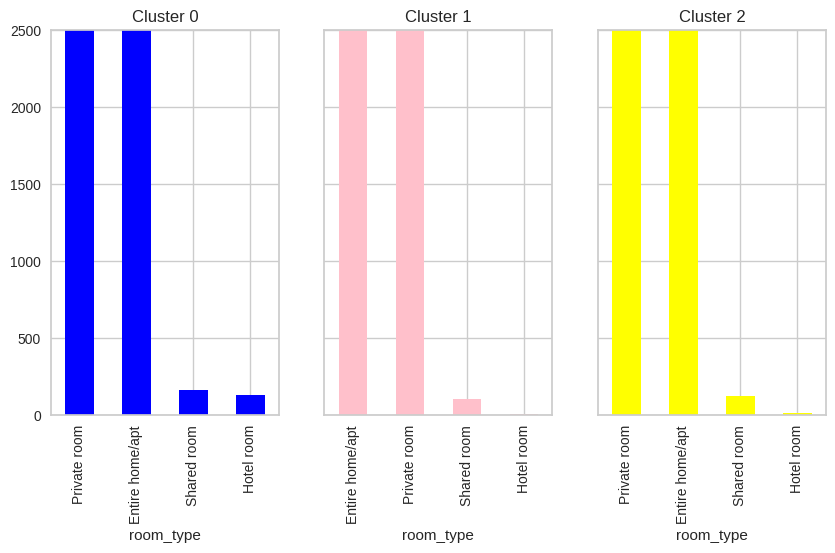

In [ ]:
fix, axs = plt.subplots(ncols=3,nrows=1, figsize=(10,5))
df_original[df_original['cluster'] == 0]['room_type'].value_counts().plot.bar(ax=axs[0], ylim=(0, 2500), sharey=True, title='Cluster 0', color='Blue')
df_original[df_original['cluster'] == 1]['room_type'].value_counts().plot.bar(ax=axs[1], ylim=(0, 2500), sharey=True, title='Cluster 1', color='Pink')
df_original[df_original['cluster'] == 2]['room_type'].value_counts().plot.bar(ax=axs[2], ylim=(0, 2500), sharey=True, title='Cluster 2', color='yellow')


El cluster 0 maneja tipo de cuartos de hotel y habitaciones comaprtidas, pero los tres cluster manejan los cuartos privados y casas / apartamentos completos

# Gneral por Cluster

**El listado de alojamientos en New Yor se puede agrupar por tres grupos**

## Cluster 0 Alojamientos Versátiles y Moderados

Manejan precios moderados altos, podemos encontrar reseñas recientes de los usuarios.

Tiene comodidades basicas y comodidades de mas en cualquier tipo de alojamiento

Te permite quedarte minimo 13 noches y maximos hasta más de un año en alojamiento.

Tiene mas variedad de habitaciones como hoteles y habitaciones compartidas en comparación de otros alojamientos.

## Cluster 1 Alojamientos Premium y Exclusivos

Maneja precios altos, debido a sus grandes comodidades que le dan un plus para aquellos usuarios que desean disfrutar.

Se puede encontra gran cantidad de reseñas pero pueden que no sean recientes.

Te permiten alojarte minimo 17 noches y maximo más de un año en promedio.

Por ser más ostentoso manejasolo tres tipos de habitaciones en menor cantidad aquellas que son compartidas pues respentan mejor la privacidad.

## Cluster 2 Alojamientos Económicos y Prácticos

Maneja precios mas bajos en comparación de los otros grupos.

Tiene menos comodidades por ende tiende a tener menos cantidad de baños y habitaciones

No hay muchas reseñas para evaluar

pues si decides alojarte por vacaciones cortas y despejarte de la rutina esta es la opción